In [41]:
#extracting the bin edges and the bin sizes
import scipy.io
import pandas as pd

# Replace 'your_file.mat' with the path to your MATLAB file
matlab_file = '/srv/network_analysis_outputs/SYNGAP1_T1_v2/Network_outputs/extendedMetrics.mat'

# Load the MATLAB file
mat_contents = scipy.io.loadmat(matlab_file)

# Display the keys in the MATLAB file
print("Keys in the MATLAB file:")
for key in mat_contents.keys():
    print(key)

# Inspect the contents of 'allExtMetrics'
if 'allExtMetrics' in mat_contents:
    allExtMetrics = mat_contents['allExtMetrics']
    print("allExtMetrics contents:")
    print(allExtMetrics)
else:
    print("Key 'allExtMetrics' not found in the MATLAB file")

Keys in the MATLAB file:
__header__
__version__
__globals__
allExtMetrics
allExtMetrics contents:
[[array([[array([[(array([[2]], dtype=uint8), array([[4]], dtype=uint8), array([[1]], dtype=uint8), array(['M06691'], dtype='<U6'), array(['WT'], dtype='<U2'), array([[1, 0, 0, ..., 0, 0, 3]], dtype=uint8), array([[4.21717614e-03, 4.21845493e-03, 4.21973411e-03, ...,
                          4.99696904e+03, 4.99848429e+03, 5.00000000e+03]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]))                                                                                                                               ]],
                dtype=[('Run_ID', 'O'), ('DIV', 'O'), ('Well', 'O'), ('Chip_ID', 'O'), ('NeuronType', 'O'), ('networkAPFreqBins', 'O'), ('networkAPFreqEdges', 'O'), ('burstAPFreqBins', 'O'), ('burstAPFreqEdges', 'O'), ('nonburstAPFreqBins', 'O'), ('nonburstAPFreqEdges', 'O')])],
         [array([[(array([[2]], dtype=uint8), array([[4]], dtype=uint8), array([[2]

In [42]:
allExtMetrics[0][1][0][0][0]['Chip_ID'][0][0]

'M07036'

In [43]:
#Below is the code for plotting the graphs without normalization using the Bins and bin edges for the all the RUN_IDs for network frequency

In [44]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
# Load the MATLAB file
mat_file_path = '/srv/network_analysis_outputs/SYNGAP1_T1_v2/Network_outputs/extendedMetrics.mat'
mat_data = scipy.io.loadmat(mat_file_path)



all_records = np.squeeze(mat_data['allExtMetrics'])
refined_results = []   
for idx, record in enumerate(all_records):
    try:
        if record.size > 0:
                for item in record:
                    #print(item[0][0][0])
                    if item.size > 0:
                        div = item[0][0][0]['DIV'][0][0]
                        well = item[0][0][0]['Well'][0][0]
                        Run_ID = item[0][0][0]['Run_ID'][0][0]
                        Chip_ID = item[0][0][0]['Chip_ID'][0]
                        NeuronType = item[0][0][0]['NeuronType'][0]
                        networkAPFreqBins = item[0][0][0]['networkAPFreqBins'][0]
                        networkAPFreqEdges = item[0][0][0]['networkAPFreqEdges'][0]
                        burstAPFreqBins = item[0][0][0]['burstAPFreqBins'][0]
                        burstAPFreqEdges = item[0][0][0]['burstAPFreqEdges'][0]
                        nonburstAPFreqBins = item[0][0][0]['nonburstAPFreqBins'][0]
                        nonburstAPFreqEdges = item[0][0][0]['nonburstAPFreqEdges'][0]
                        refined_entry = {
                            'Run_ID': Run_ID,
                            'Chip_ID': Chip_ID,
                            'DIV': div,
                            'WellRecord': well,
                            'NeuronType': NeuronType,
                            'networkAPFreqBins': networkAPFreqBins,
                            'networkAPFreqEdges': networkAPFreqEdges,
                            'burstAPFreqBins': burstAPFreqBins,
                            'burstAPFreqEdges': burstAPFreqEdges,
                            'nonburstAPFreqBins': nonburstAPFreqBins,
                            'nonburstAPFreqEdges': nonburstAPFreqEdges
                        }
                        refined_results.append(refined_entry)
       
            
    except Exception as e:
            print(f"An error occurred at entry {idx+1}: {str(e)}")
            continue
# Function to plot histograms for each neuron type as lines with shading



In [45]:
refined_results

[{'Run_ID': 2,
  'Chip_ID': 'M06691',
  'DIV': 4,
  'WellRecord': 1,
  'NeuronType': 'WT',
  'networkAPFreqBins': array([1, 0, 0, ..., 0, 0, 3], dtype=uint8),
  'networkAPFreqEdges': array([4.21717614e-03, 4.21845493e-03, 4.21973411e-03, ...,
         4.99696904e+03, 4.99848429e+03, 5.00000000e+03]),
  'burstAPFreqBins': array([nan]),
  'burstAPFreqEdges': array([nan]),
  'nonburstAPFreqBins': array([nan]),
  'nonburstAPFreqEdges': array([nan])},
 {'Run_ID': 2,
  'Chip_ID': 'M06691',
  'DIV': 4,
  'WellRecord': 2,
  'NeuronType': 'WT',
  'networkAPFreqBins': array([ 1,  0,  0, ...,  0,  0, 32], dtype=uint8),
  'networkAPFreqEdges': array([3.99429615e-03, 3.99554928e-03, 3.99680281e-03, ...,
         4.99686417e+03, 4.99843184e+03, 5.00000000e+03]),
  'burstAPFreqBins': array([nan]),
  'burstAPFreqEdges': array([nan]),
  'nonburstAPFreqBins': array([nan]),
  'nonburstAPFreqEdges': array([nan])},
 {'Run_ID': 2,
  'Chip_ID': 'M06691',
  'DIV': 4,
  'WellRecord': 3,
  'NeuronType': 'WT',
 

In [46]:
div_values = [entry['DIV'] for entry in refined_results]

# To get only unique DIV values, you can use a set
unique_div_values = list(set(div_values))

print(unique_div_values)

[4, 7, 12, 15, 19, 22, 26, 29]


In [47]:
# get the specific div data
div_data = [entry for entry in refined_results if entry['DIV'] == 22]

In [48]:
import pandas as pd

div_data_df = pd.DataFrame.from_dict(div_data)
div_data_df

Run_ID Chip_ID  DIV  WellRecord NeuronType  \
0       42  M06691   22           1         WT   
1       42  M06691   22           2         WT   
2       42  M06691   22           3         WT   
3       42  M06691   22           4         WT   
4       42  M06691   22           5         WT   
5       42  M06691   22           6         WT   
6       48  M07036   22           1        HET   
7       48  M07036   22           2        HET   
8       48  M07036   22           3        HET   
9       48  M07036   22           4        HET   
10      48  M07036   22           5        HET   
11      48  M07036   22           6        HET   
12      44  M07301   22           1         WT   
13      44  M07301   22           2         WT   
14      44  M07301   22           3         WT   
15      44  M07301   22           4         WT   
16      44  M07301   22           5         WT   
17      44  M07301   22           6         WT   
18      46  M07309   22           1        HET   
19      46  M07309   22           2        HET   
20      46  M07309   22           3        HET   
21      46  M07309   22           4        HET   
22      46  M07309   22           5        HET   
23      46  M07309   22           6        HET   

                                    networkAPFreqBins  \
0   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...   
1   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4   [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
5   [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
6   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
7   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
8   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
9   [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...   
10  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
11  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
12  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
13  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
14  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
15  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
16  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
17  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
18  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
19  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
20  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
21  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
22  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
23  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                   networkAPFreqEdges  \
0   [0.009186912324702189, 0.009207347721176977, 0...   
1   [0.006619851079830097, 0.006639633414483693, 0...   
2   [0.004962968808237341, 0.0049801105513903815, ...   
3   [0.005271789756807066, 0.005297784091530175, 0...   
4   [0.008111135534641448, 0.00814975060778199, 0....   
5   [0.010605724758109924, 0.010646564725917485, 0...   
6   [0.00544546341165911, 0.0054666550673301275, 0...   
7   [0.007401557435715608, 0.007433367774985924, 0...   
8   [0.00675649197531444, 0.006769308805452705, 0....   
9   [0.008822333207174071, 0.008856897578091466, 0...   
10  [0.007638859182214345, 0.007682720113410865, 0...   
11  [0.004795486871395604, 0.00481956859466177, 0....   
12  [0.00617932016355424, 0.006188527176311742, 0....   
13  [0.0045003892836730465, 0.0045081074835827874,...   
14  [0.006963293693623431, 0.006984293386440317, 0...   
15  [0.004911403197716402, 0.004934371187248973, 0...   
16  [0.003679382982191416, 0.0036970691550016884, ...   
17  [0.010775920128879997, 0.010818937141228854, 0...   
18  [0.004641071159223553, 0.004652021365017872, 0...   
19  [0.004839420760050387, 0.004858947411555119, 0...   
20  [0.003917166040050667, 0.003927533883830945, 0...   
21  [0.007061802779384304, 0.007092485346834818, 0...   
22  [0.005390867

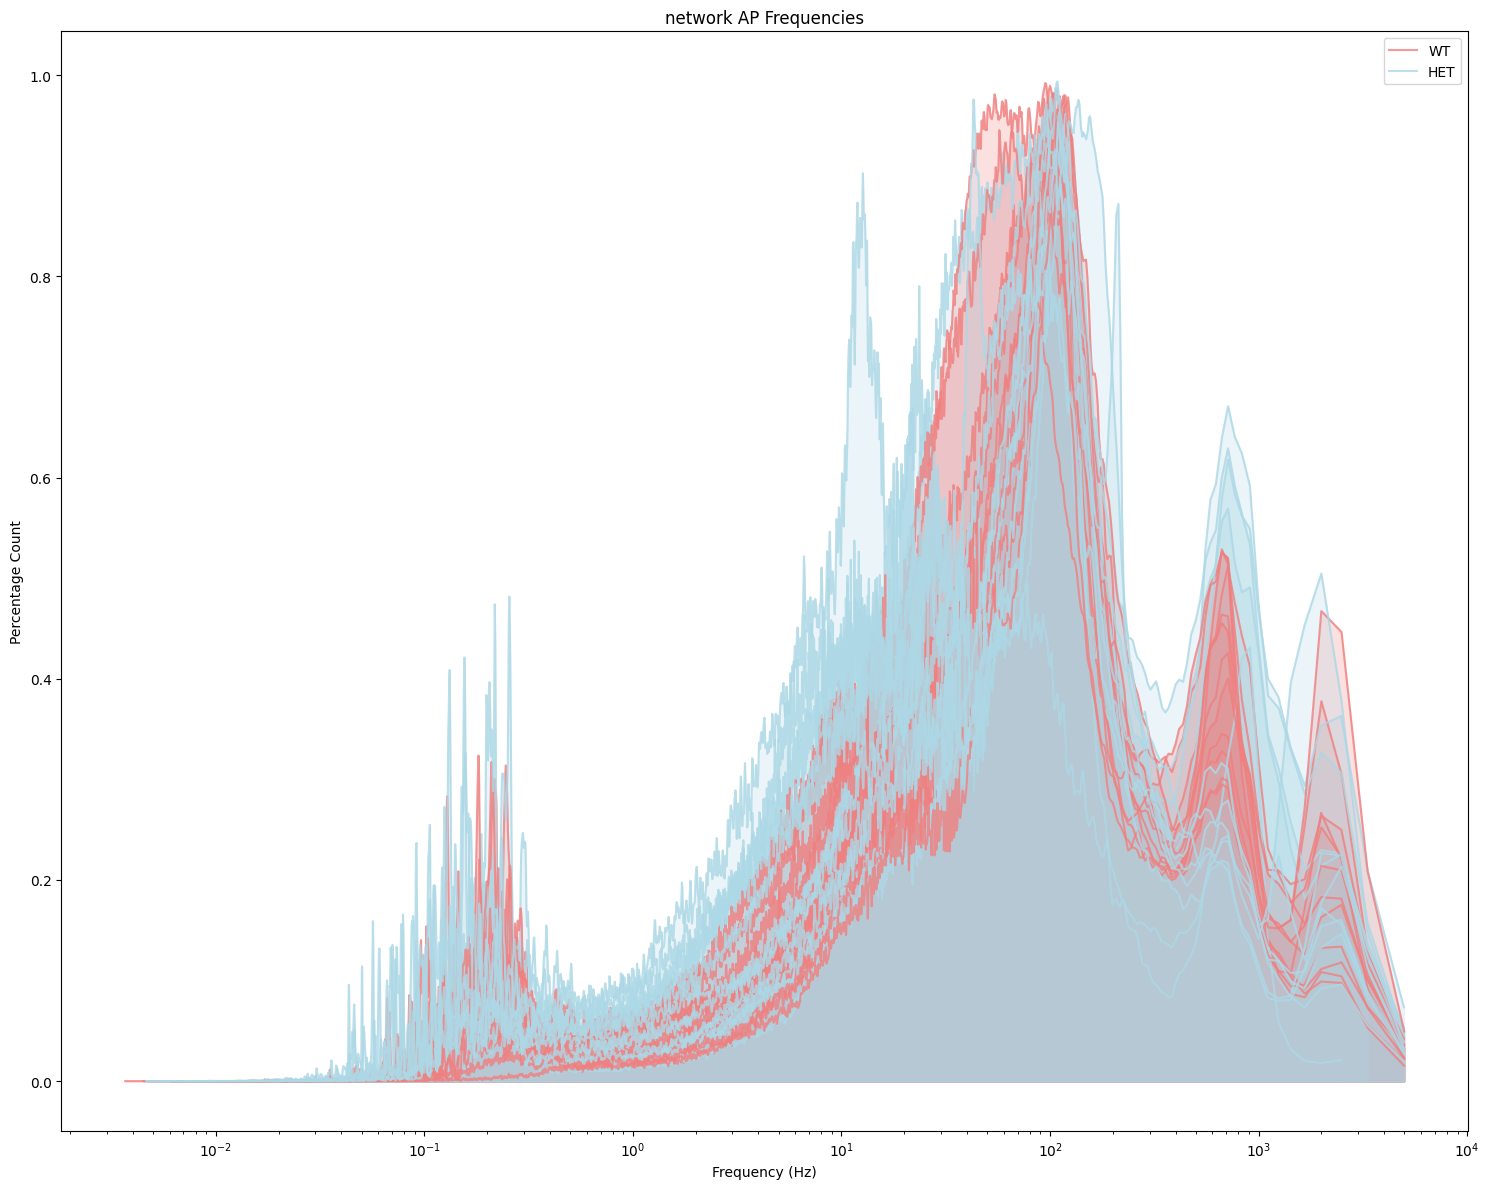

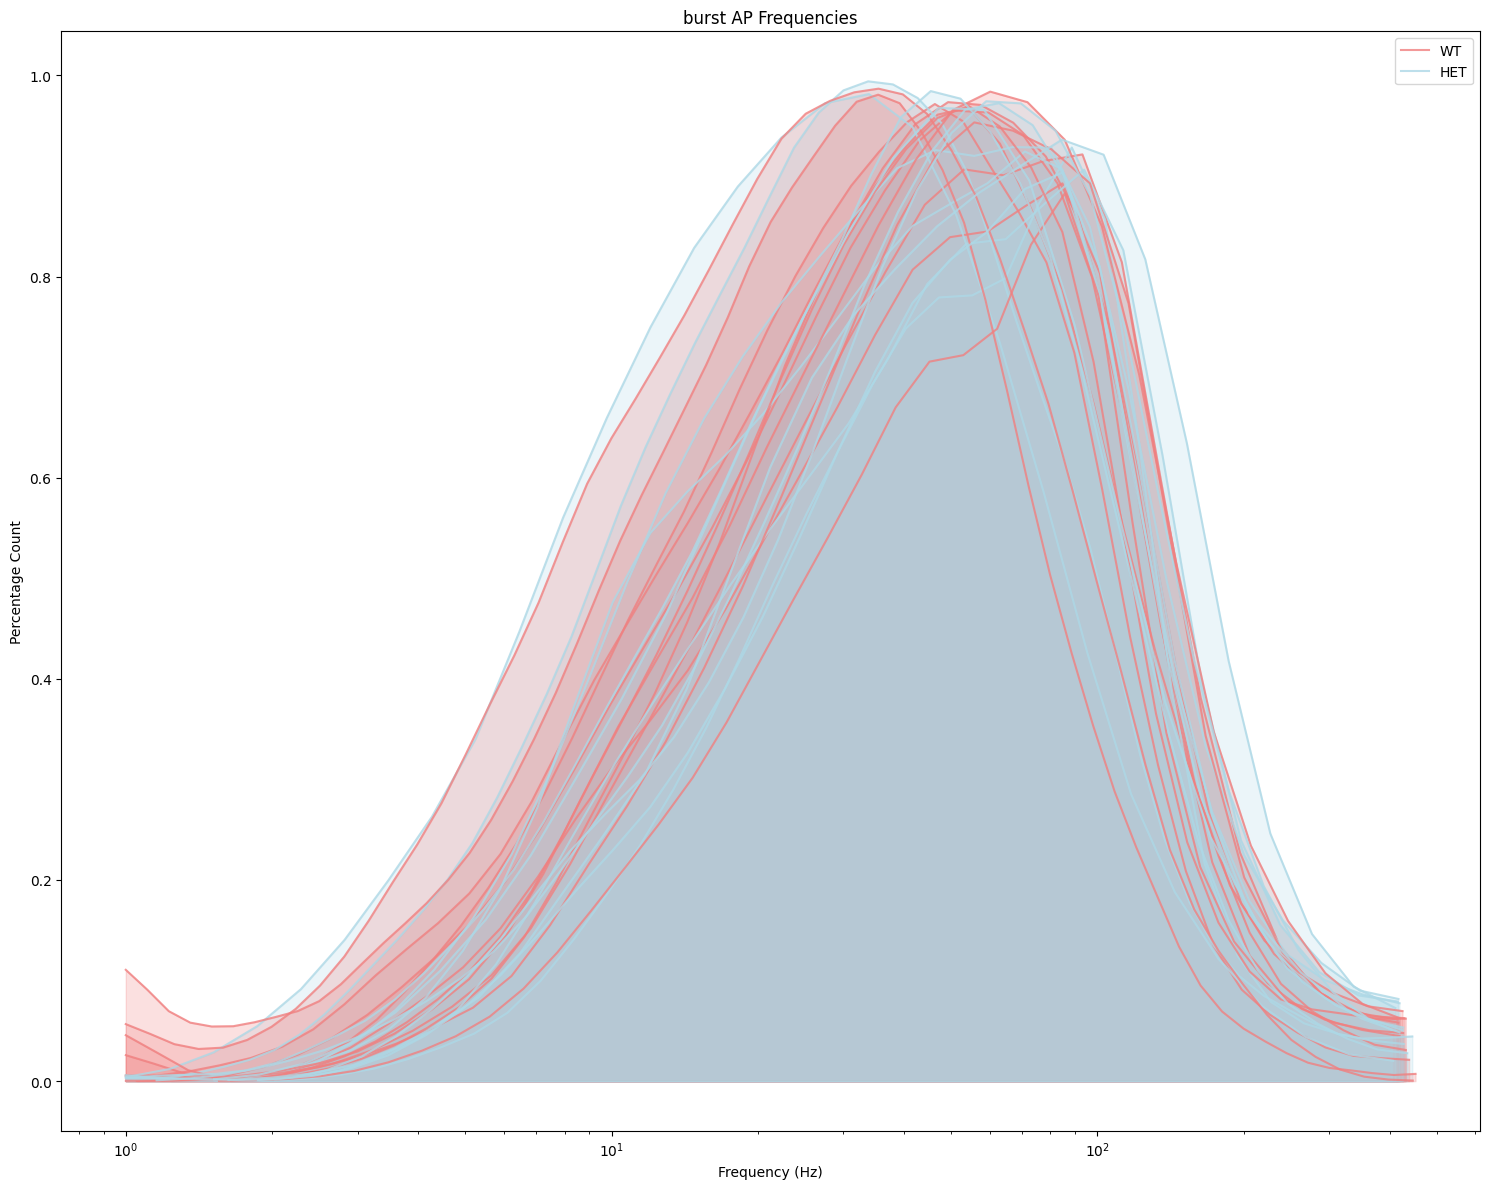

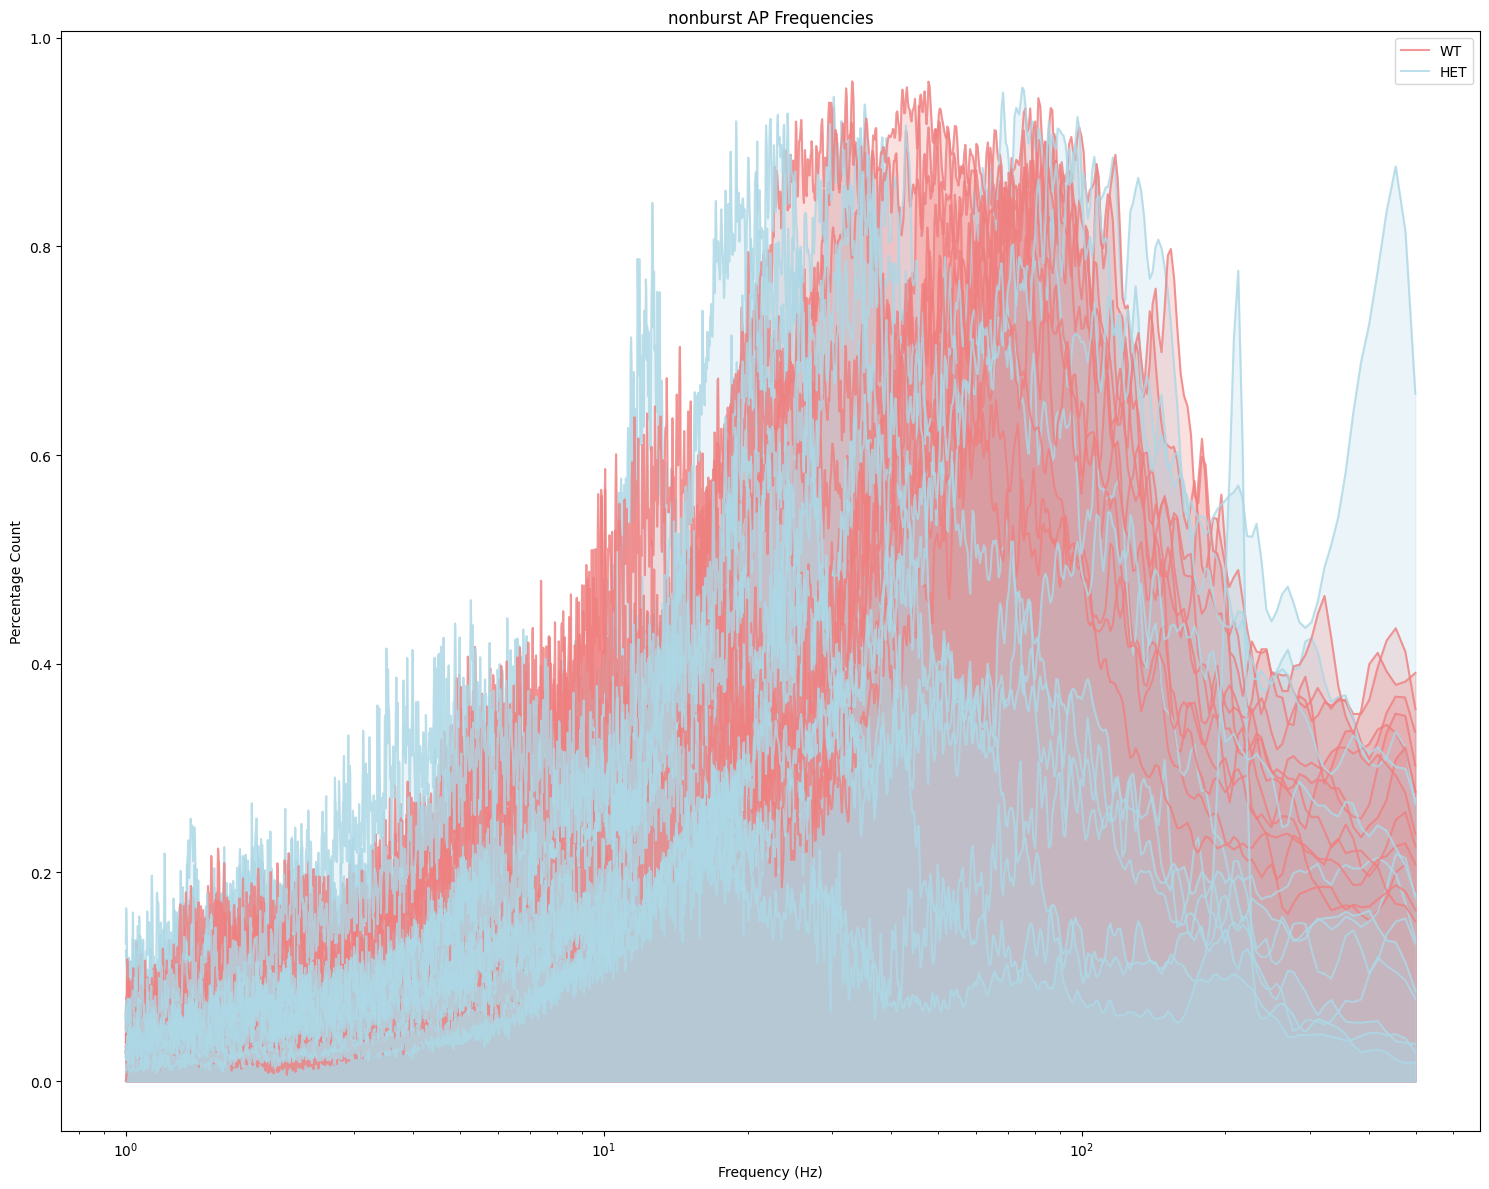

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import interp1d

def min_max_normalize(data):
    min_val = np.min(data)
    max_val = np.max(data)
    return (data - min_val) / (max_val - min_val)

def plot_line_normalize_percentage(data_df):

    ### betw
    # Get the unique neuron types
    neuron_types = data_df['NeuronType'].unique()

    # Define colors and transparencies for each neuron type
    
    # Define distinct colors for each neuron type
    colors = {
        'WT': 'lightcoral',   # light red equivalent
        'HET': 'lightblue',   # valid color name
    }
    

    # Define the keys for different AP frequency categories
    keys = ['networkAPFreqBins', 'burstAPFreqBins', 'nonburstAPFreqBins']

    # Assuming all entries share the same edges
    max_edges = None
    for item in data_df.to_dict('records'):
        if max_edges is None or len(item['networkAPFreqEdges']) > len(max_edges):
            max_edges = item['networkAPFreqEdges']

    # Create figures for each category
    for key in keys:
        plt.figure(figsize=(15, 12))  # Figure size as specified

        aggregate_data = {nt: np.zeros_like(max_edges[:-1]) for nt in neuron_types}  # Initialize aggregate data
        neuron_legend_added = {nt: False for nt in neuron_types}  # To control legend entry for each subplot

        for item in data_df.to_dict('records'):
            bins = item[key]
            edges = item[key.replace('Bins', 'Edges')]
            neuron_type = item['NeuronType']

            # Filter out zero data
            mask = bins != 0
            filtered_bins = bins[mask]
            filtered_edges = edges[:-1][mask]

            # Normalize data
            normalized_bins = min_max_normalize(filtered_bins)

            # Smooth data
            smoothed_bins = gaussian_filter1d(normalized_bins, sigma=1)

            # Interpolate to the standardized edges
            interp = interp1d(filtered_edges, smoothed_bins, kind='previous', bounds_error=False, fill_value=0)
            standardized_bins = interp(max_edges[:-1])

            # Update aggregate data
            aggregate_data[neuron_type] += standardized_bins

            # Plot data with transparency
            alpha = 0.8
            plt.plot(filtered_edges, smoothed_bins, color=colors[neuron_type], alpha=alpha, label=neuron_type if not neuron_legend_added[neuron_type] else "")
            plt.fill_between(filtered_edges, smoothed_bins, color=colors[neuron_type], alpha=alpha * 0.3)  # Add shaded area

            # Ensure legend is added once per neuron type across all subplots
            if not neuron_legend_added[neuron_type]:
                neuron_legend_added[neuron_type] = True

        plt.xscale('log')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Percentage Count')
        plt.title(f"{key.replace('APFreqBins', ' AP Frequencies')}")
        plt.legend(loc='upper right')

        plt.tight_layout()
        plt.show()


plot_line_normalize_percentage(div_data_df)

['WT' 'HET']


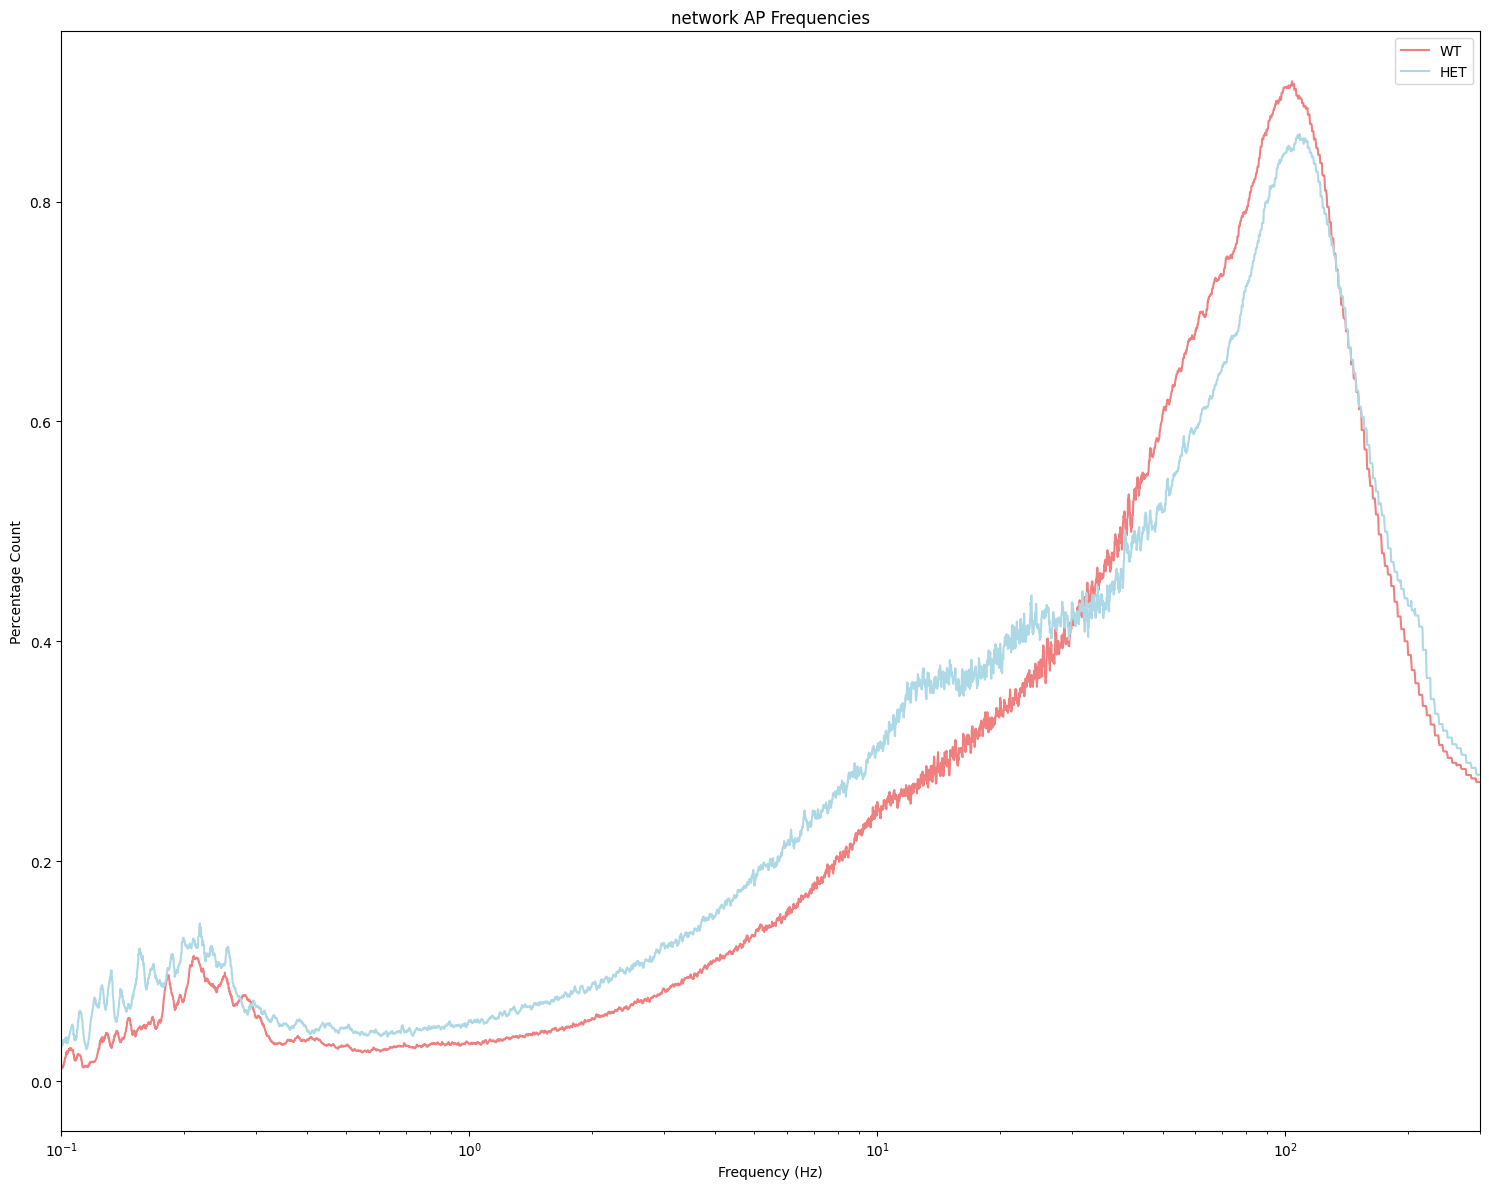

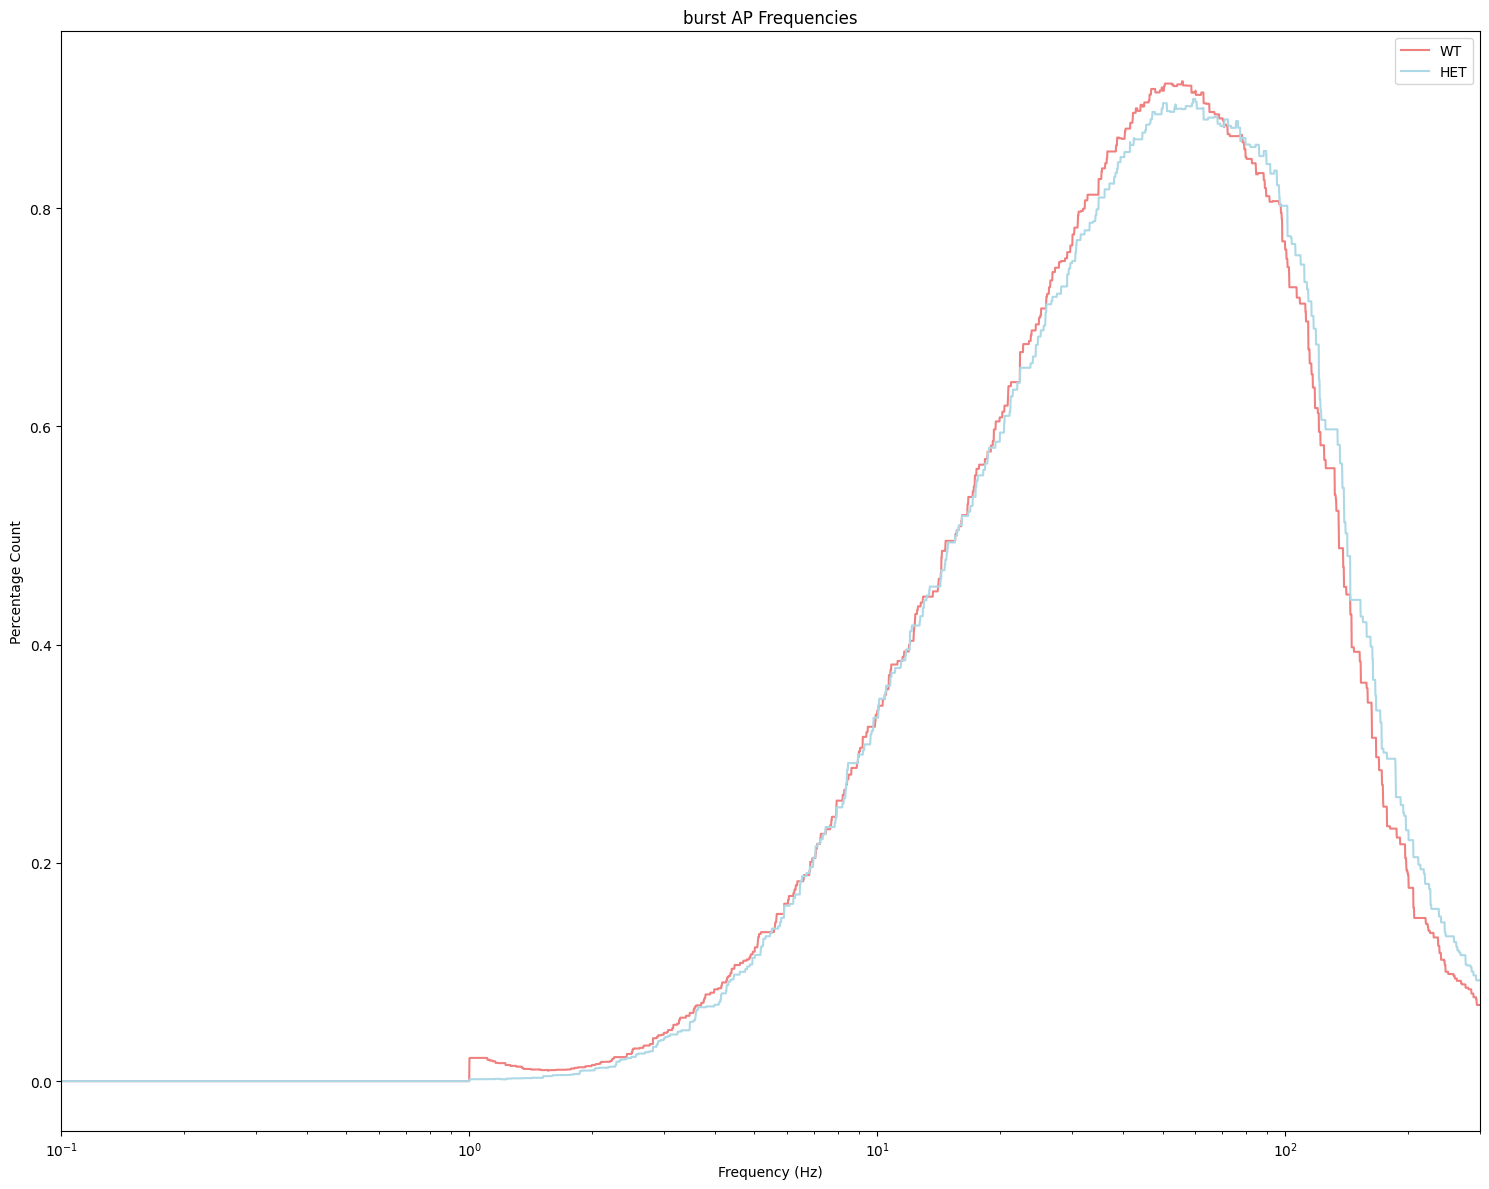

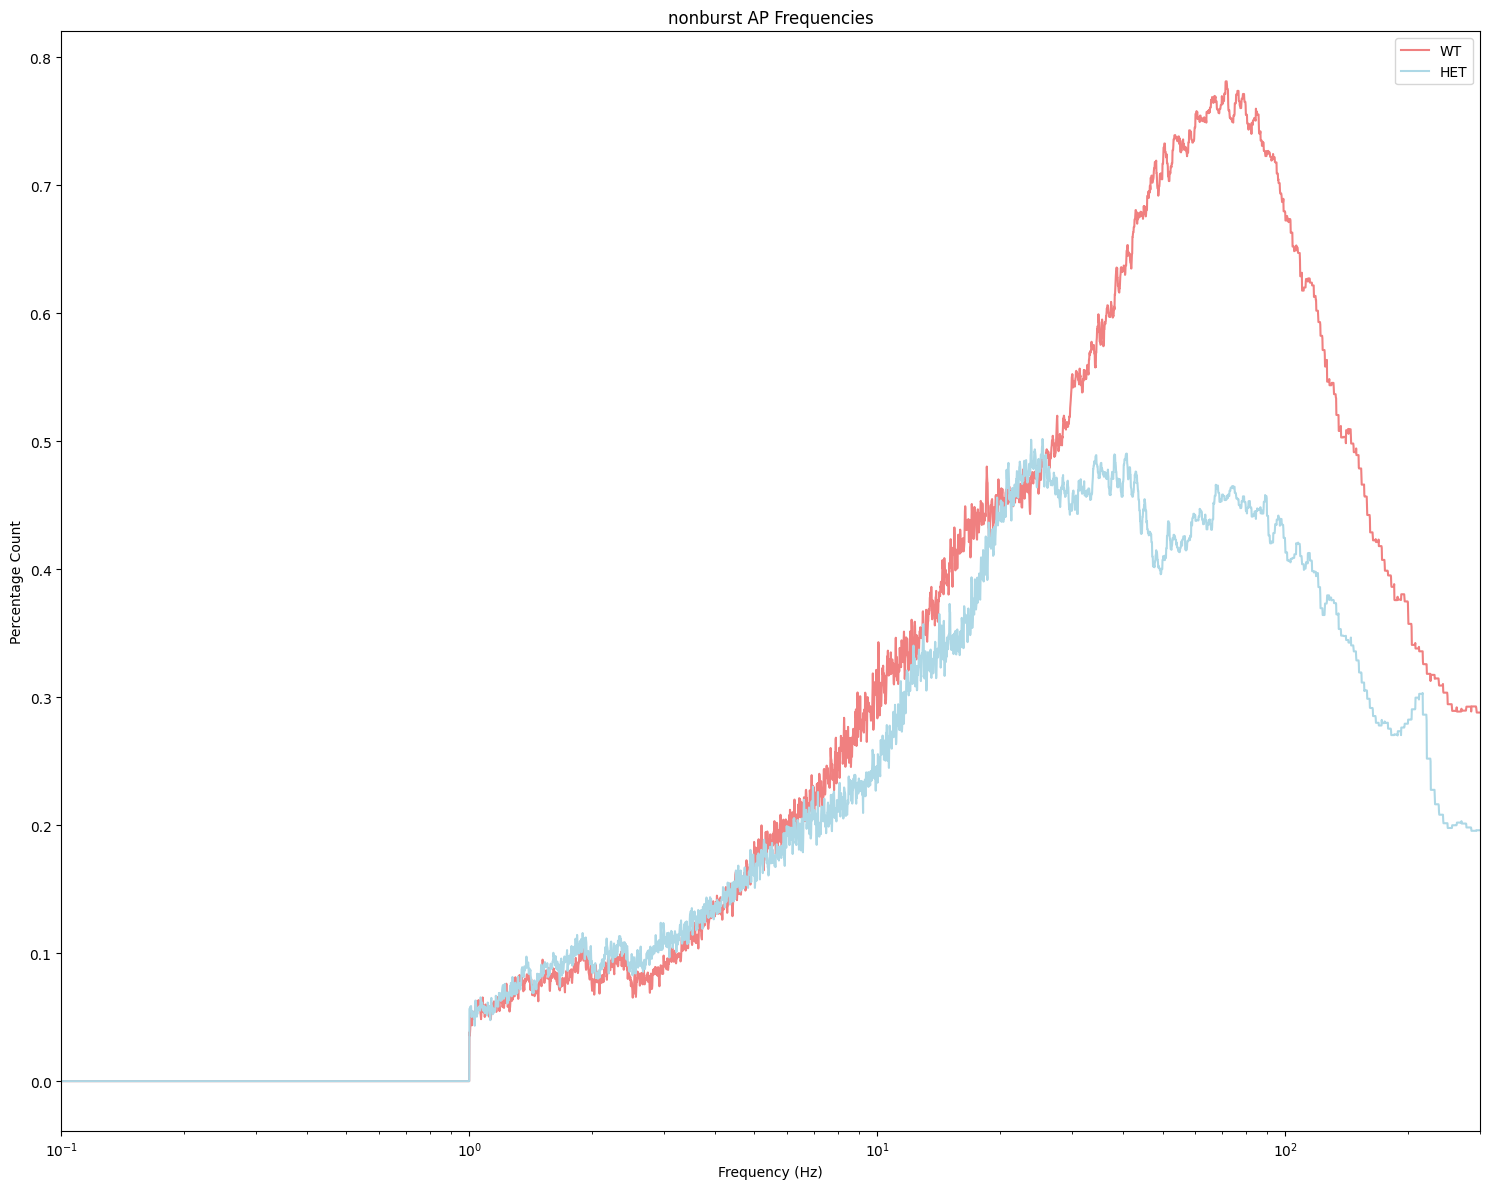

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import interp1d
from scipy.stats import sem  # for standard error calculation

def min_max_normalize(data):
    min_val = np.min(data)
    max_val = np.max(data)
    return (data - min_val) / (max_val - min_val)

def plot_line_normalize_percentage(data_df):
    # Get the unique neuron types
    neuron_types = data_df['NeuronType'].unique()
    print(neuron_types)
    # Define colors and transparencies for each neuron type
   
    # Define distinct colors for each neuron type
    colors = {
        'WT': 'lightcoral',   # light red equivalent
        'HET': 'lightblue',   # valid color name
    }

    # Define the keys for different AP frequency categories
    keys = ['networkAPFreqBins', 'burstAPFreqBins', 'nonburstAPFreqBins']

    # Assuming all entries share the same edges
    max_edges = None
    for item in data_df.to_dict('records'):
        if max_edges is None or len(item['networkAPFreqEdges']) > len(max_edges):
            max_edges = item['networkAPFreqEdges']

    # Create figures for each category
    for key in keys:
        plt.figure(figsize=(15, 12))  # Figure size as specified

        aggregate_data = {nt: [] for nt in neuron_types}  # Store all normalized bins for each neuron type

        for item in data_df.to_dict('records'):
            bins = item[key]
            edges = item[key.replace('Bins', 'Edges')]
            neuron_type = item['NeuronType']

            # Filter out zero data
            mask = bins != 0
            filtered_bins = bins[mask]
            filtered_edges = edges[:-1][mask]

            # Normalize data
            normalized_bins = min_max_normalize(filtered_bins)

            # Smooth data
            smoothed_bins = gaussian_filter1d(normalized_bins, sigma=1)

            # Interpolate to the standardized edges
            interp = interp1d(filtered_edges, smoothed_bins, kind='previous', bounds_error=False, fill_value=0)
            standardized_bins = interp(max_edges[:-1])

            # Append to aggregate data
            aggregate_data[neuron_type].append(standardized_bins)

        for neuron_type, bins_list in aggregate_data.items():
            if bins_list:
                # Convert to numpy array for easier calculations
                bins_array = np.array(bins_list)

                # Calculate mean and standard error
                mean_bins = np.mean(bins_array, axis=0)
                stderr_bins = sem(bins_array, axis=0)

                # Plot data with transparency and shaded error area
                plt.plot(max_edges[:-1], mean_bins, color=colors[neuron_type], label=neuron_type)
                #plt.fill_between(max_edges[:-1], mean_bins - stderr_bins, mean_bins + stderr_bins, color=colors[neuron_type], alpha=0.3)

        plt.xscale('log')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Percentage Count')
        plt.title(f"{key.replace('APFreqBins', ' AP Frequencies')}")
        plt.legend(loc='upper right')
        plt.xlim(0.1, 300)
        plt.tight_layout()
        plt.show()

plot_line_normalize_percentage(div_data_df)

In [70]:
#extracting the bin edges and the bin sizes
import scipy.io
import pandas as pd

# Replace 'your_file.mat' with the path to your MATLAB file
matlab_file = '/srv/network_analysis_outputs/SYNGAP1_T2/Network_outputs/extendedMetrics.mat'

# Load the MATLAB file
mat_contents = scipy.io.loadmat(matlab_file)

# Display the keys in the MATLAB file
print("Keys in the MATLAB file:")
for key in mat_contents.keys():
    print(key)

# Inspect the contents of 'allExtMetrics'
if 'allExtMetrics' in mat_contents:
    allExtMetrics = mat_contents['allExtMetrics']
    print("allExtMetrics contents:")
    print(allExtMetrics)
else:
    print("Key 'allExtMetrics' not found in the MATLAB file")

Keys in the MATLAB file:
__header__
__version__
__globals__
allExtMetrics
allExtMetrics contents:
[[array([[array([[(array([[2]], dtype=uint8), array([[4]], dtype=uint8), array([[1]], dtype=uint8), array(['M08019'], dtype='<U6'), array(['HET'], dtype='<U3'), array([[ 1,  0,  0, ...,  0,  0, 57]], dtype=uint8), array([[4.26622434e-03, 4.26850504e-03, 4.27078695e-03, ...,
                          2.49732918e+03, 2.49866423e+03, 2.50000000e+03]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]))                                                                                                                                      ]],
                dtype=[('Run_ID', 'O'), ('DIV', 'O'), ('Well', 'O'), ('Chip_ID', 'O'), ('NeuronType', 'O'), ('networkAPFreqBins', 'O'), ('networkAPFreqEdges', 'O'), ('burstAPFreqBins', 'O'), ('burstAPFreqEdges', 'O'), ('nonburstAPFreqBins', 'O'), ('nonburstAPFreqEdges', 'O')])],
         [array([[(array([[2]], dtype=uint8), array([[4]], dtype=uint

In [71]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
# Load the MATLAB file
mat_file_path = '/srv/network_analysis_outputs/SYNGAP1_T2/Network_outputs/extendedMetrics.mat'
mat_data = scipy.io.loadmat(mat_file_path)



all_records = np.squeeze(mat_data['allExtMetrics'])
refined_results = []   
for idx, record in enumerate(all_records):
    try:
        if record.size > 0:
                for item in record:
                    #print(item[0][0][0])
                    if item.size > 0:
                        div = item[0][0][0]['DIV'][0][0]
                        well = item[0][0][0]['Well'][0][0]
                        Run_ID = item[0][0][0]['Run_ID'][0][0]
                        Chip_ID = item[0][0][0]['Chip_ID'][0]
                        NeuronType = item[0][0][0]['NeuronType'][0]
                        networkAPFreqBins = item[0][0][0]['networkAPFreqBins'][0]
                        networkAPFreqEdges = item[0][0][0]['networkAPFreqEdges'][0]
                        burstAPFreqBins = item[0][0][0]['burstAPFreqBins'][0]
                        burstAPFreqEdges = item[0][0][0]['burstAPFreqEdges'][0]
                        nonburstAPFreqBins = item[0][0][0]['nonburstAPFreqBins'][0]
                        nonburstAPFreqEdges = item[0][0][0]['nonburstAPFreqEdges'][0]
                        refined_entry = {
                            'Run_ID': Run_ID,
                            'Chip_ID': Chip_ID,
                            'DIV': div,
                            'WellRecord': well,
                            'NeuronType': NeuronType,
                            'networkAPFreqBins': networkAPFreqBins,
                            'networkAPFreqEdges': networkAPFreqEdges,
                            'burstAPFreqBins': burstAPFreqBins,
                            'burstAPFreqEdges': burstAPFreqEdges,
                            'nonburstAPFreqBins': nonburstAPFreqBins,
                            'nonburstAPFreqEdges': nonburstAPFreqEdges
                        }
                        refined_results.append(refined_entry)
       
            
    except Exception as e:
            print(f"An error occurred at entry {idx+1}: {str(e)}")
            continue
# Function to plot histograms for each neuron type as lines with shading


In [81]:
div_values = [entry['DIV'] for entry in refined_results]

# To get only unique DIV values, you can use a set
unique_div_values = list(set(div_values))

print(unique_div_values)

[4, 8, 11, 15, 18]


In [73]:
# get the specific div data
div_data = [entry for entry in refined_results if entry['DIV'] == 18]

In [82]:
import pandas as pd

div_data_df = pd.DataFrame.from_dict(div_data)
div_data_df

Run_ID Chip_ID  DIV  WellRecord NeuronType  \
0       18  M08019   18           1        HET   
1       18  M08019   18           2        HET   
2       18  M08019   18           3        HET   
3       18  M08019   18           4        HET   
4       18  M08019   18           5        HET   
5       18  M08019   18           6        HET   
6       20  M08027   18           1        HET   
7       20  M08027   18           2        HET   
8       20  M08027   18           3        HET   
9       20  M08027   18           4        HET   
10      20  M08027   18           5        HET   
11      20  M08027   18           6        HET   

                                    networkAPFreqBins  \
0   [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
5   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
6   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
7   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
8   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
9   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
10  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
11  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                   networkAPFreqEdges  \
0   [0.0037016074970877603, 0.003706835919892825, ...   
1   [0.0070774764266953805, 0.007088831755693331, ...   
2   [0.005530364744145959, 0.005538011297345062, 0...   
3   [0.004570732775307804, 0.004574337625961333, 0...   
4   [0.004447164132376065, 0.004452183635574434, 0...   
5   [0.003450830666703942, 0.0034542661018414694, ...   
6   [0.003767752708825806, 0.0037750871861097885, ...   
7   [0.004007826483557088, 0.004015219935436974, 0...   
8   [0.0047038790538618015, 0.004712007714708632, ...   
9   [0.005459021852464448, 0.005464583596197986, 0...   
10  [0.005036735429857692, 0.0050418271428128835, ...   
11  [0.003750180946230654, 0.0037548709859851915, ...   

                                      burstAPFreqBins  \
0   [1862, 1391, 1365, 1451, 1694, 1983, 2553, 331...   
1   [877, 701, 1954, 3086, 4848, 5232, 6519, 8068,...   
2   [1361, 1655, 1496, 1781, 1886, 2492, 2336, 302...   
3                                               [nan]   
4   [1148, 1277, 1486, 1660, 1976, 2621, 3547, 404...   
5   [710, 677, 495, 585, 588, 801, 980, 1185, 1479...   
6   [864, 967, 1516, 1978, 2558, 3686, 5196, 5830,...   
7   [1125, 1097, 1016, 1133, 1200, 1439, 1816, 221...   
8   [1882, 1258, 1579, 2757, 4696, 5896, 7593, 795...   
9   [450, 412, 508, 620, 777, 942, 1168, 1359, 146...   
10  [1017, 900, 803, 978, 986, 1124, 1347, 1590, 1...   
11  [1122, 1061, 1120, 1300, 1948, 2168, 2726, 364...   

                                     burstAPFreqEdges  \
0   [1.0001000100010016, 1.1556043443979145, 1.335...   
1   [1.0006003602161495, 1.387707671242682, 1.9245...   
2   [1.0001000100009962, 1.1556043443979085, 1.335...   
3                                               [nan]   
4   [1.0001000100009998, 1.1681983700254708, 1.364...   
5   [1.0005002501250506, 1.1136466687112252, 1.239...   
6   [1.0010010010010058, 1.2313618519521956, 1.514...   
7   [1.0001000100010033, 1.1637800525134292, 1.354...   
8   [1.000100010000975, 1.2956828354232965, 1.6786...   
9   [1.000600360216121, 1.1226302850763688, 1.2595...   
10  [1.0001000100009962, 1.1055401140072694, 1.222...   
11  [1.0002000400080011, 1.1886550604067774, 1.412...   

                                   nonburstAPFreqBins  \
0   [59, 55, 45, 48, 49, 46, 41, 44, 37, 41, 50, 4...   
1   [19, 17, 28, 23, 31, 24, 10, 23, 18, 14, 18, 1...   
2   [20, 37, 26, 25, 23, 28, 35, 19, 22, 20, 27, 2...   
3                                               [nan]   
4   [35, 16, 32, 38, 26, 33, 38, 24, 28, 31, 24, 2...   
5   [29, 21, 19, 21, 27, 42, 27, 32, 24, 23

In [92]:
# check length of networkAPFreqBins column
print(div_data_df['networkAPFreqBins'].apply(len))
print(div_data_df['burstAPFreqBins'].apply(len))
print(div_data_df['nonburstAPFreqBins'].apply(len))

0     10001
1      8401
2      9926
3     17638
4     12351
5     14257
6      7041
7      7616
8      8037
9     13481
10    13666
11    11284
Name: networkAPFreqBins, dtype: int64
0     43
1     19
2     43
3      1
4     40
5     58
6     30
7     41
8     24
9     54
10    62
11    36
Name: burstAPFreqBins, dtype: int64
0      6274
1      9075
2      8628
3         1
4     11648
5     15001
6      7079
7      6950
8      9191
9     12967
10    13310
11    11038
Name: nonburstAPFreqBins, dtype: int64


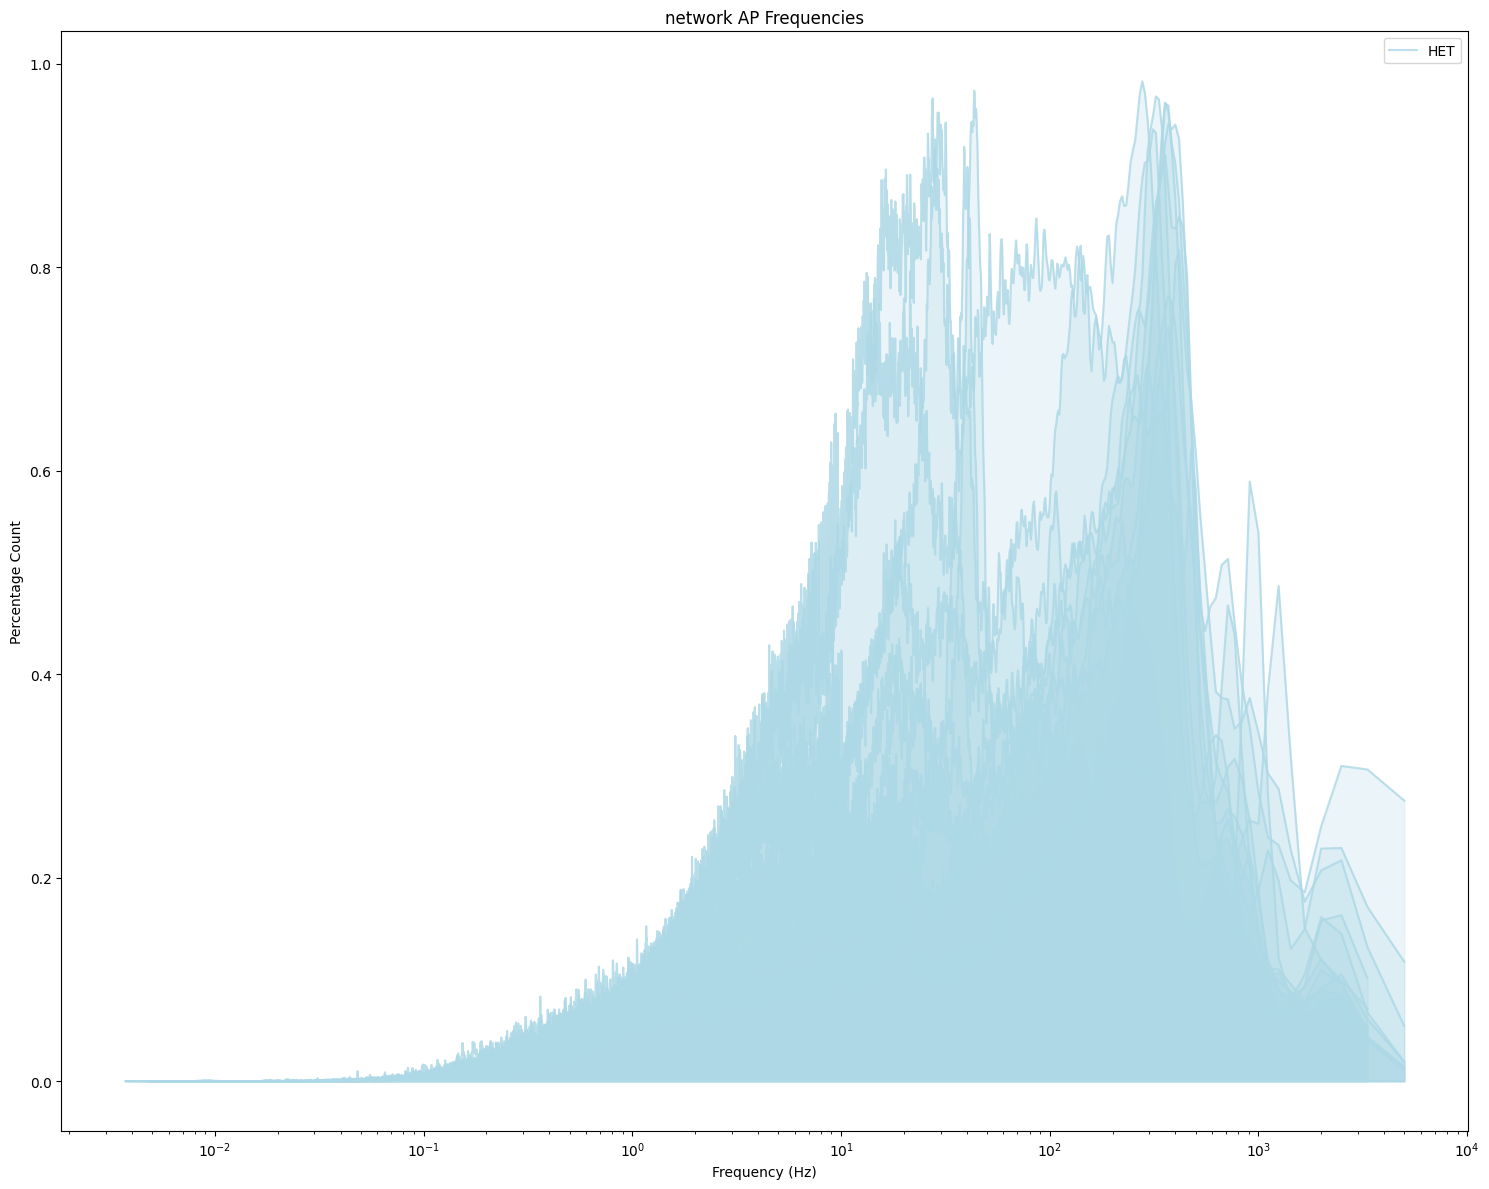

IndexError: boolean index did not match indexed array along dimension 0; dimension is 0 but corresponding boolean dimension is 1

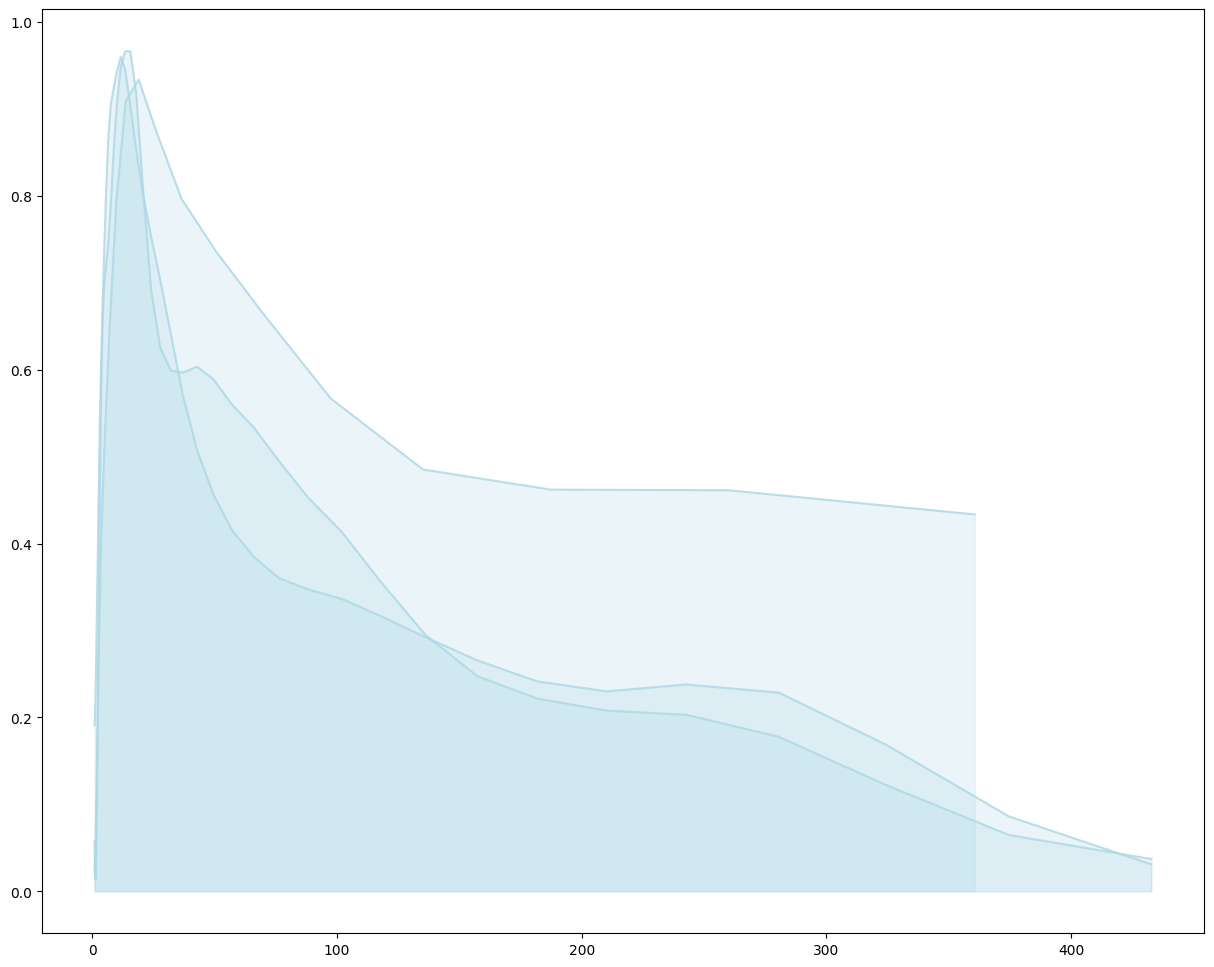

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import interp1d

def min_max_normalize(data):
    min_val = np.min(data)
    max_val = np.max(data)
    return (data - min_val) / (max_val - min_val)

def plot_line_normalize_percentage(data_df):

    ### betw
    # Get the unique neuron types
    neuron_types = data_df['NeuronType'].unique()

    # Define colors and transparencies for each neuron type
    
    # Define distinct colors for each neuron type
    colors = {
        'HET': 'lightblue',   # valid color name
    }
    

    # Define the keys for different AP frequency categories
    keys = ['networkAPFreqBins', 'burstAPFreqBins', 'nonburstAPFreqBins']

    # Assuming all entries share the same edges
    max_edges = None
    for item in data_df.to_dict('records'):
        if max_edges is None or len(item['networkAPFreqEdges']) > len(max_edges):
            max_edges = item['networkAPFreqEdges']

    # Create figures for each category
    for key in keys:
        plt.figure(figsize=(15, 12))  # Figure size as specified

        aggregate_data = {nt: np.zeros_like(max_edges[:-1]) for nt in neuron_types}  # Initialize aggregate data
        neuron_legend_added = {nt: False for nt in neuron_types}  # To control legend entry for each subplot

        for item in data_df.to_dict('records'):
            bins = item[key]
            edges = item[key.replace('Bins', 'Edges')]
            neuron_type = item['NeuronType']

            # Filter out zero data
            mask = bins != 0
            filtered_bins = bins[mask]
            filtered_edges = edges[:-1][mask]

            # Normalize data
            normalized_bins = min_max_normalize(filtered_bins)

            # Smooth data
            smoothed_bins = gaussian_filter1d(normalized_bins, sigma=1)

            # Interpolate to the standardized edges
            interp = interp1d(filtered_edges, smoothed_bins, kind='previous', bounds_error=False, fill_value=0)
            standardized_bins = interp(max_edges[:-1])

            # Update aggregate data
            aggregate_data[neuron_type] += standardized_bins

            # Plot data with transparency
            alpha = 0.8
            plt.plot(filtered_edges, smoothed_bins, color=colors[neuron_type], alpha=alpha, label=neuron_type if not neuron_legend_added[neuron_type] else "")
            plt.fill_between(filtered_edges, smoothed_bins, color=colors[neuron_type], alpha=alpha * 0.3)  # Add shaded area

            # Ensure legend is added once per neuron type across all subplots
            if not neuron_legend_added[neuron_type]:
                neuron_legend_added[neuron_type] = True

        plt.xscale('log')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Percentage Count')
        plt.title(f"{key.replace('APFreqBins', ' AP Frequencies')}")
        plt.legend(loc='upper right')

        plt.tight_layout()
        plt.show()


plot_line_normalize_percentage(div_data_df)

['HET']


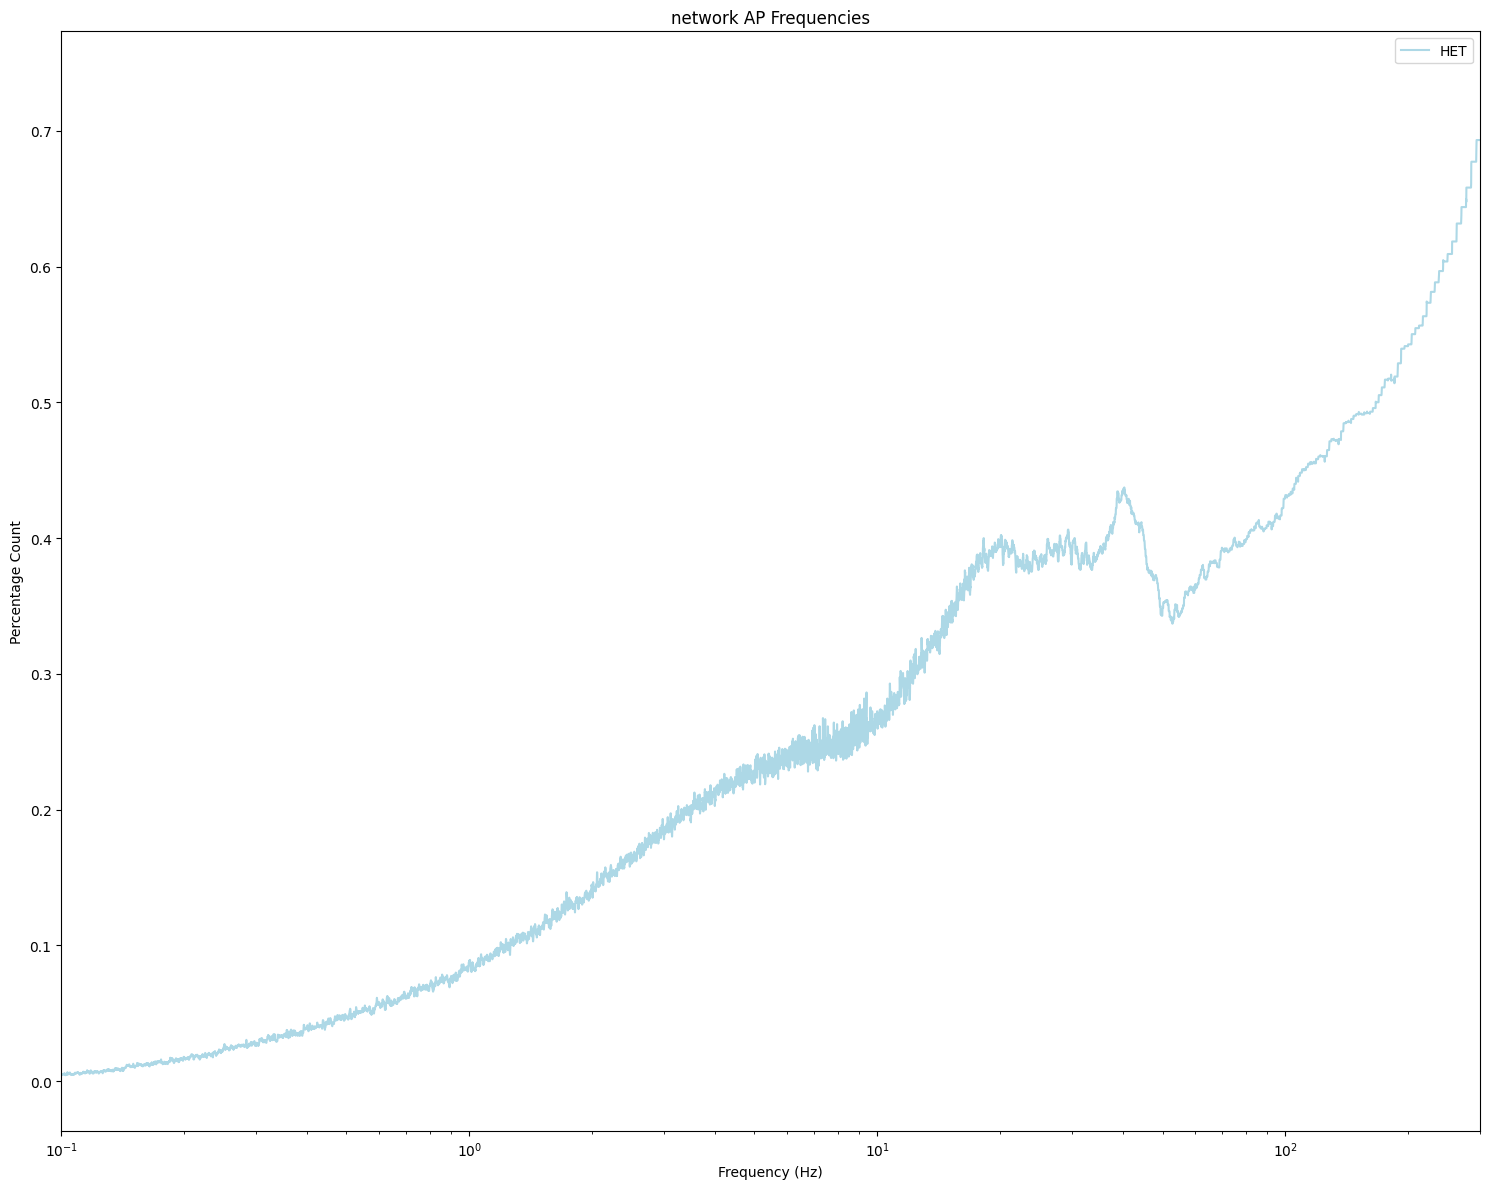

Mismatch detected: Skipping this entry.


ValueError: x and y arrays must be equal in length along interpolation axis.

<Figure size 1500x1200 with 0 Axes>

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import interp1d
from scipy.stats import sem  # for standard error calculation

def min_max_normalize(data):
    min_val = np.min(data)
    max_val = np.max(data)
    return (data - min_val) / (max_val - min_val)

def plot_line_normalize_percentage(data_df):
    # Get the unique neuron types
    neuron_types = data_df['NeuronType'].unique()
    print(neuron_types)
    # Define colors and transparencies for each neuron type
   
    # Define distinct colors for each neuron type
    colors = {
        'HET': 'lightblue',   # valid color name
    }

    # Define the keys for different AP frequency categories
    keys = ['networkAPFreqBins', 'burstAPFreqBins', 'nonburstAPFreqBins']

    # Assuming all entries share the same edges
    max_edges = None
    for item in data_df.to_dict('records'):
        if max_edges is None or len(item['networkAPFreqEdges']) > len(max_edges):
            max_edges = item['networkAPFreqEdges']

    # Create figures for each category
    for key in keys:
        plt.figure(figsize=(15, 12))  # Figure size as specified

        aggregate_data = {nt: [] for nt in neuron_types}  # Store all normalized bins for each neuron type

        for item in data_df.to_dict('records'):
            bins = item[key]
            edges = item[key.replace('Bins', 'Edges')]
            neuron_type = item['NeuronType']

            # Filter out zero data
            mask = bins != 0
            filtered_bins = bins[mask]

            if len(mask) == len(edges[:-1]):
                filtered_edges = edges[:-1][mask]
            else:
                print("Mismatch detected: Skipping this entry.")

            # Normalize data
            normalized_bins = min_max_normalize(filtered_bins)

            # Smooth data
            smoothed_bins = gaussian_filter1d(normalized_bins, sigma=1)

            # Interpolate to the standardized edges
            interp = interp1d(filtered_edges, smoothed_bins, kind='previous', bounds_error=False, fill_value=0)
            standardized_bins = interp(max_edges[:-1])

            # Append to aggregate data
            aggregate_data[neuron_type].append(standardized_bins)

        for neuron_type, bins_list in aggregate_data.items():
            if bins_list:
                # Convert to numpy array for easier calculations
                bins_array = np.array(bins_list)

                # Calculate mean and standard error
                mean_bins = np.mean(bins_array, axis=0)
                stderr_bins = sem(bins_array, axis=0)

                # Plot data with transparency and shaded error area
                plt.plot(max_edges[:-1], mean_bins, color=colors[neuron_type], label=neuron_type)
                #plt.fill_between(max_edges[:-1], mean_bins - stderr_bins, mean_bins + stderr_bins, color=colors[neuron_type], alpha=0.3)

        plt.xscale('log')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Percentage Count')
        plt.title(f"{key.replace('APFreqBins', ' AP Frequencies')}")
        plt.legend(loc='upper right')
        plt.xlim(0.1, 300)
        plt.tight_layout()
        plt.show()

plot_line_normalize_percentage(div_data_df)

['HET']


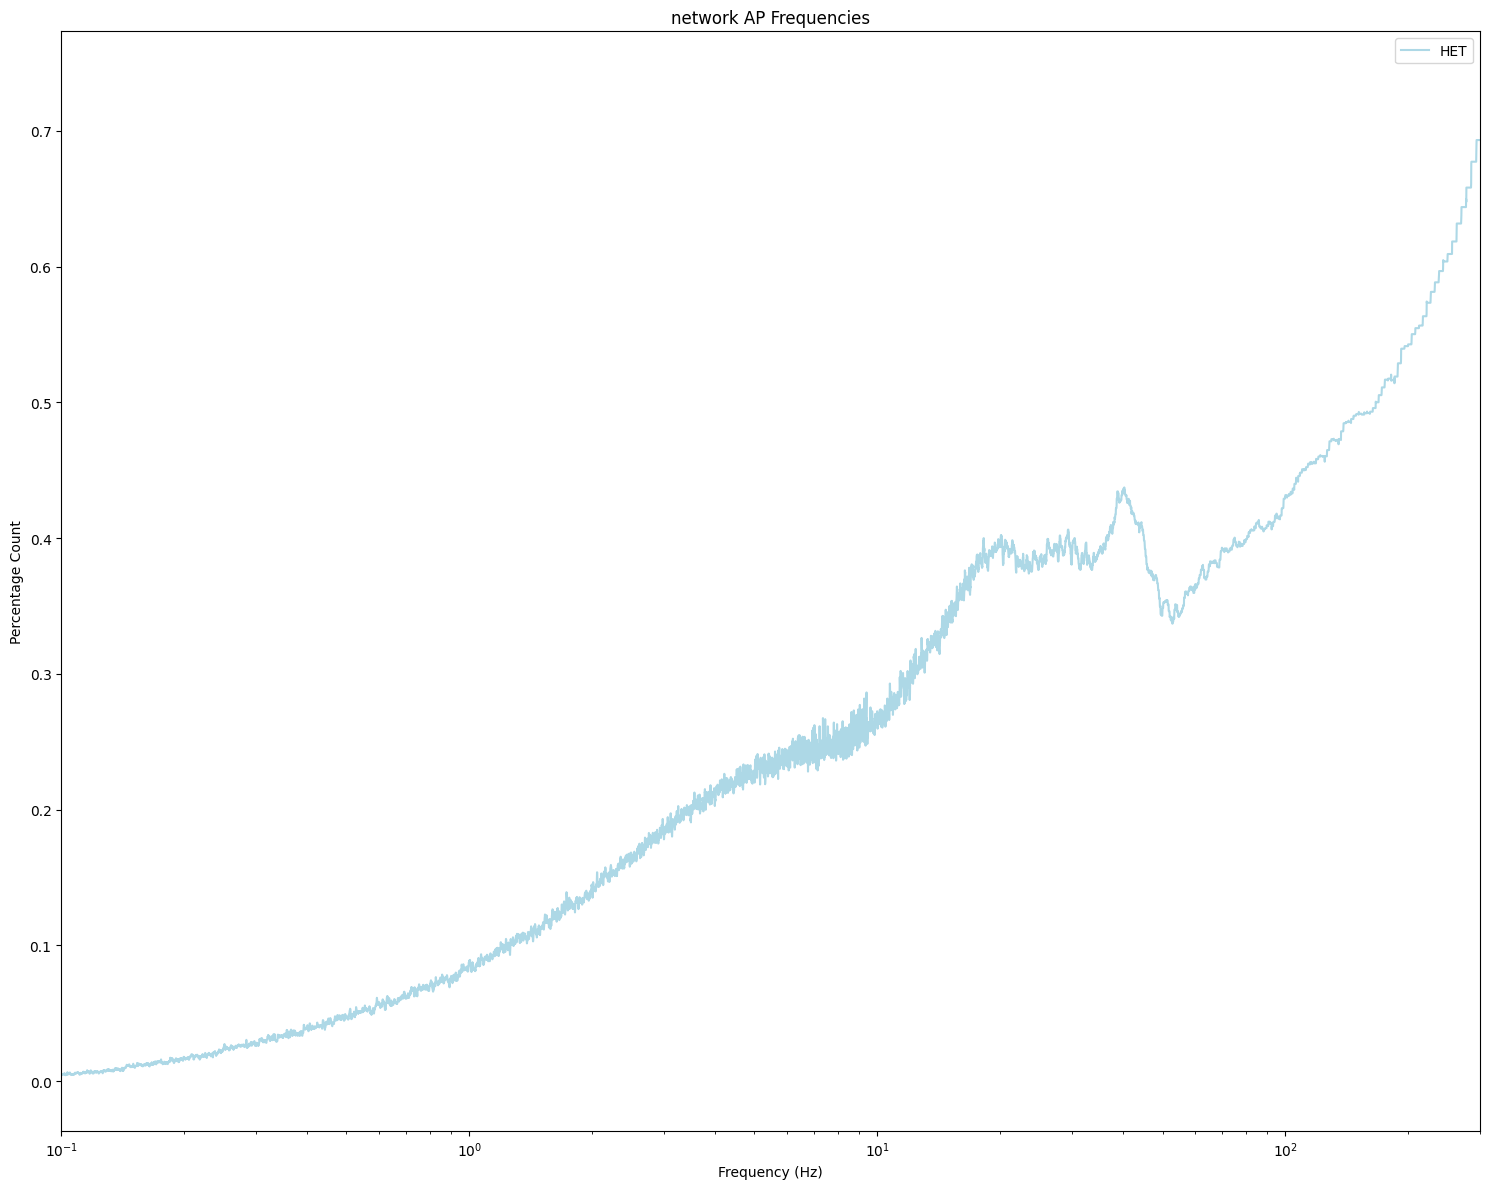

Mismatch detected: Skipping this entry for neuron type HET.


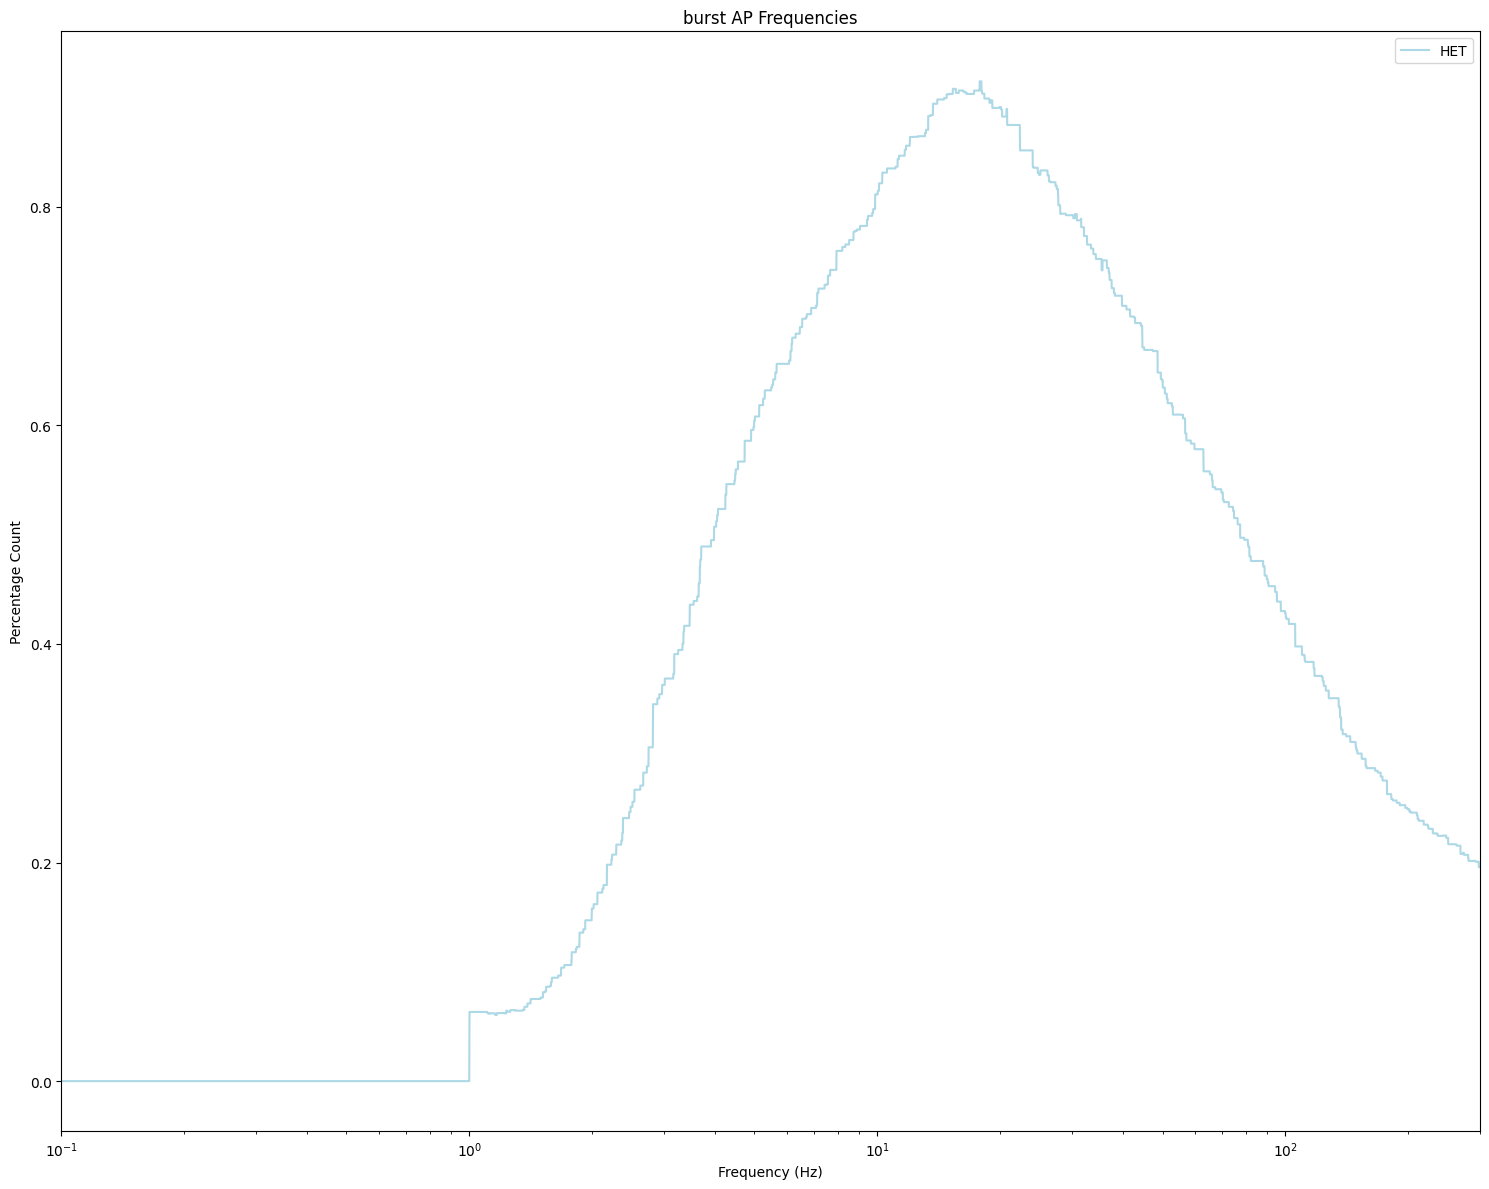

Mismatch detected: Skipping this entry for neuron type HET.


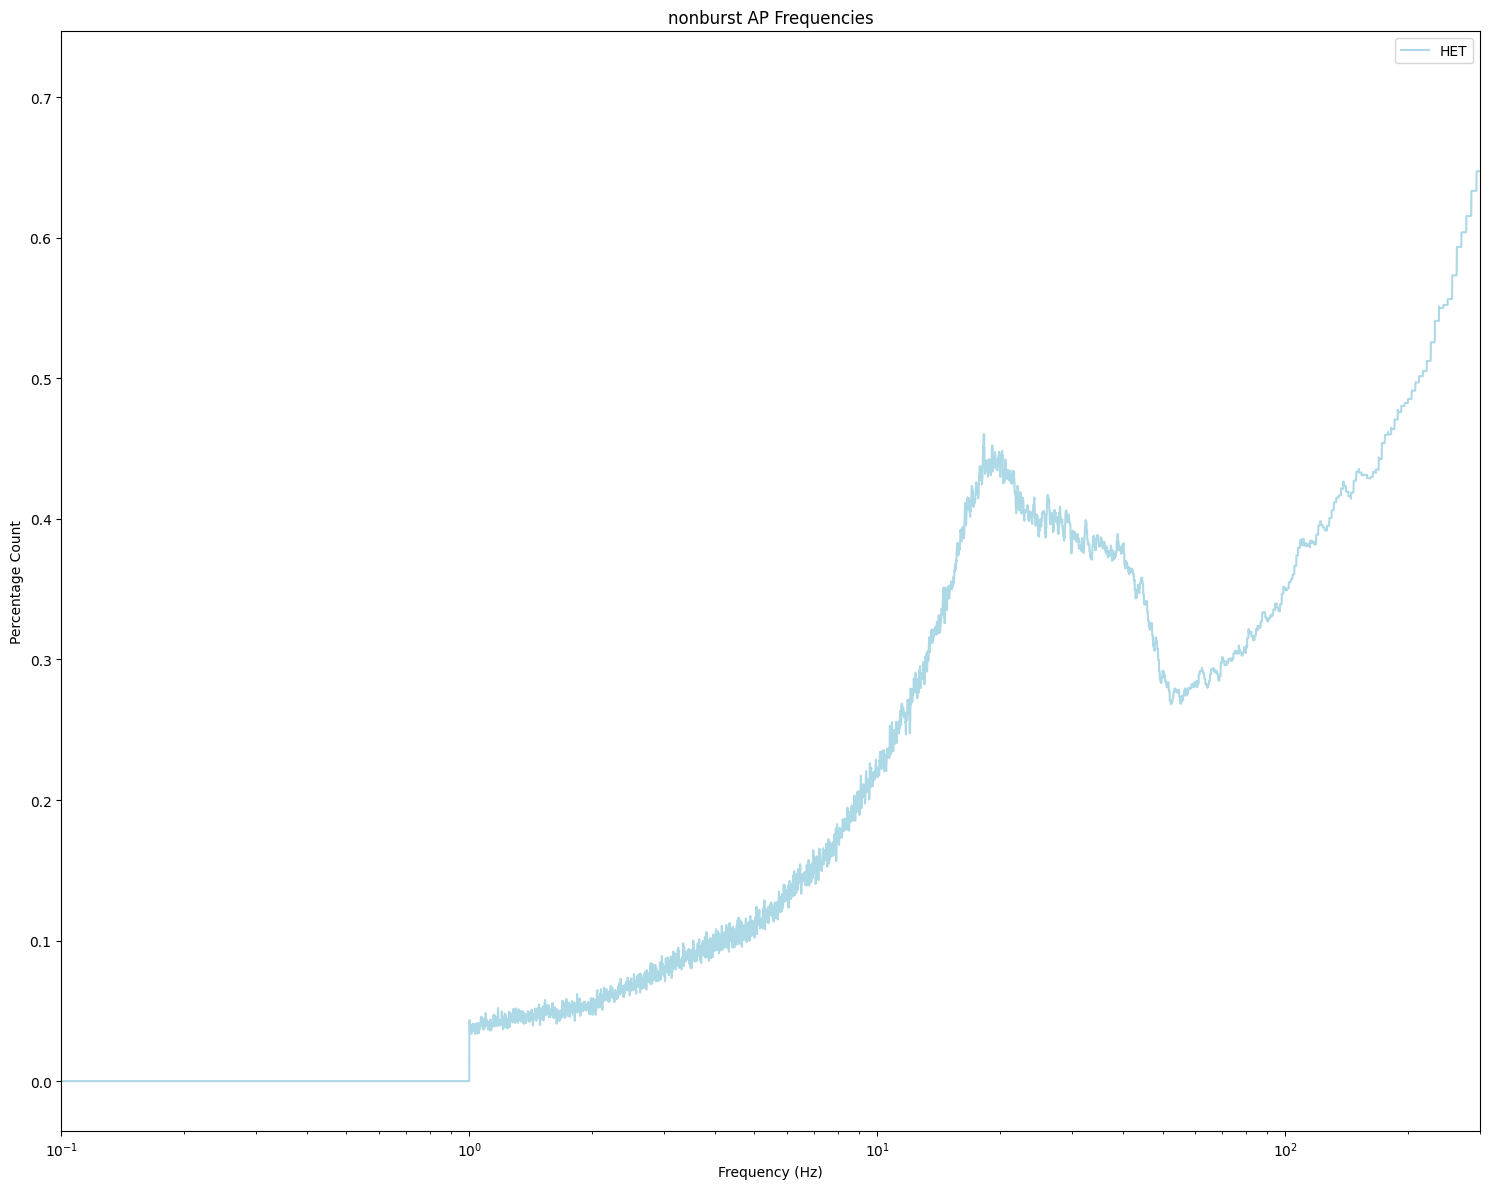

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import interp1d
from scipy.stats import sem  # for standard error calculation

def min_max_normalize(data):
    min_val = np.min(data)
    max_val = np.max(data)
    return (data - min_val) / (max_val - min_val)

def plot_line_normalize_percentage(data_df):
    # Get the unique neuron types
    neuron_types = data_df['NeuronType'].unique()
    print(neuron_types)
    # Define colors and transparencies for each neuron type
   
    # Define distinct colors for each neuron type
    colors = {
        'HET': 'lightblue',   # valid color name
    }

    # Define the keys for different AP frequency categories
    keys = ['networkAPFreqBins', 'burstAPFreqBins', 'nonburstAPFreqBins']

    # Assuming all entries share the same edges
    max_edges = None
    for item in data_df.to_dict('records'):
        if max_edges is None or len(item['networkAPFreqEdges']) > len(max_edges):
            max_edges = item['networkAPFreqEdges']

    # Create figures for each category
    for key in keys:
        plt.figure(figsize=(15, 12))  # Figure size as specified

        aggregate_data = {nt: [] for nt in neuron_types}  # Store all normalized bins for each neuron type

        for item in data_df.to_dict('records'):
            bins = item[key]
            edges = item[key.replace('Bins', 'Edges')]
            neuron_type = item['NeuronType']

            # Filter out zero data
            mask = bins != 0
            filtered_bins = bins[mask]

            if len(mask) == len(edges[:-1]):
                filtered_edges = edges[:-1][mask]
            else:
                print(f"Mismatch detected: Skipping this entry for neuron type {neuron_type}.")
                continue

            # Ensure lengths of filtered_edges and smoothed_bins match before interpolation
            if len(filtered_edges) == len(filtered_bins):
                # Normalize data
                normalized_bins = min_max_normalize(filtered_bins)

                # Smooth data
                smoothed_bins = gaussian_filter1d(normalized_bins, sigma=1)

                # Interpolate to the standardized edges
                interp = interp1d(filtered_edges, smoothed_bins, kind='previous', bounds_error=False, fill_value=0)
                standardized_bins = interp(max_edges[:-1])

                # Append to aggregate data
                aggregate_data[neuron_type].append(standardized_bins)
            else:
                print(f"Length mismatch between filtered_edges and filtered_bins: Skipping this entry for neuron type {neuron_type}.")

        for neuron_type, bins_list in aggregate_data.items():
            if bins_list:
                # Convert to numpy array for easier calculations
                bins_array = np.array(bins_list)

                # Calculate mean and standard error
                mean_bins = np.mean(bins_array, axis=0)
                stderr_bins = sem(bins_array, axis=0)

                # Plot data with transparency and shaded error area
                plt.plot(max_edges[:-1], mean_bins, color=colors[neuron_type], label=neuron_type)
                #plt.fill_between(max_edges[:-1], mean_bins - stderr_bins, mean_bins + stderr_bins, color=colors[neuron_type], alpha=0.3)

        plt.xscale('log')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Percentage Count')
        plt.title(f"{key.replace('APFreqBins', ' AP Frequencies')}")
        plt.legend(loc='upper right')
        plt.xlim(0.1, 300)
        plt.tight_layout()
        plt.show()

plot_line_normalize_percentage(div_data_df)

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import interp1d
from scipy.stats import sem  # for standard error calculation

def min_max_normalize(data):
    min_val = np.min(data)
    max_val = np.max(data)
    return (data - min_val) / (max_val - min_val)


# Get the unique neuron types
neuron_types = div_data_df['NeuronType'].unique()
print(neuron_types)
# Define colors and transparencies for each neuron type

# Define distinct colors for each neuron type
colors = {
    'HET': 'lightblue',   # valid color name
}

# Define the keys for different AP frequency categories
keys = ['networkAPFreqBins', 'burstAPFreqBins', 'nonburstAPFreqBins']

# Assuming all entries share the same edges
max_edges = None
for item in div_data_df.to_dict('records'):
    if max_edges is None or len(item['networkAPFreqEdges']) > len(max_edges):
        max_edges = item['networkAPFreqEdges']

# Create figures for each category

plt.figure(figsize=(15, 12))  # Figure size as specified

aggregate_data = {nt: [] for nt in neuron_types}  # Store all normalized bins for each neuron type

for item in div_data_df.to_dict('records'): 
    bins = item['burstAPFreqBins']
    edges = item['burstAPFreqBins'.replace('Bins', 'Edges')]
    neuron_type = item['NeuronType']

    # Filter out zero data
    mask = bins != 0
    filtered_bins = bins[mask]
    # print(len(bins))
    # print(len(edges))
    #print(edges[:-1][mask])
    print(f"Length of bins: {len(bins)}")
    print(f"Length of edges[:-1]: {len(edges[:-1])}")
#     filtered_edges = edges[:-1][mask]

#     # Normalize data
#     normalized_bins = min_max_normalize(filtered_bins)

#     # Smooth data
#     smoothed_bins = gaussian_filter1d(normalized_bins, sigma=1)

#     # Interpolate to the standardized edges
#     interp = interp1d(filtered_edges, smoothed_bins, kind='previous', bounds_error=False, fill_value=0)
#     standardized_bins = interp(max_edges[:-1])

#     # Append to aggregate data
#     aggregate_data[neuron_type].append(standardized_bins)

# for neuron_type, bins_list in aggregate_data.items():
#     if bins_list:
#         # Convert to numpy array for easier calculations
#         bins_array = np.array(bins_list)

#         # Calculate mean and standard error
#         mean_bins = np.mean(bins_array, axis=0)
#         stderr_bins = sem(bins_array, axis=0)

#         # Plot data with transparency and shaded error area
#         plt.plot(max_edges[:-1], mean_bins, color=colors[neuron_type], label=neuron_type)
#         #plt.fill_between(max_edges[:-1], mean_bins - stderr_bins, mean_bins + stderr_bins, color=colors[neuron_type], alpha=0.3)

# plt.xscale('log')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Percentage Count')
# plt.title(f"{key.replace('APFreqBins', ' AP Frequencies')}")
# plt.legend(loc='upper right')
# plt.xlim(0.1, 300)
# plt.tight_layout()
# plt.show()

['HET']
Length of bins: 43
Length of edges[:-1]: 43
Length of bins: 19
Length of edges[:-1]: 19
Length of bins: 43
Length of edges[:-1]: 43
Length of bins: 1
Length of edges[:-1]: 0
Length of bins: 40
Length of edges[:-1]: 40
Length of bins: 58
Length of edges[:-1]: 58
Length of bins: 30
Length of edges[:-1]: 30
Length of bins: 41
Length of edges[:-1]: 41
Length of bins: 24
Length of edges[:-1]: 24
Length of bins: 54
Length of edges[:-1]: 54
Length of bins: 62
Length of edges[:-1]: 62
Length of bins: 36
Length of edges[:-1]: 36


<Figure size 1500x1200 with 0 Axes>

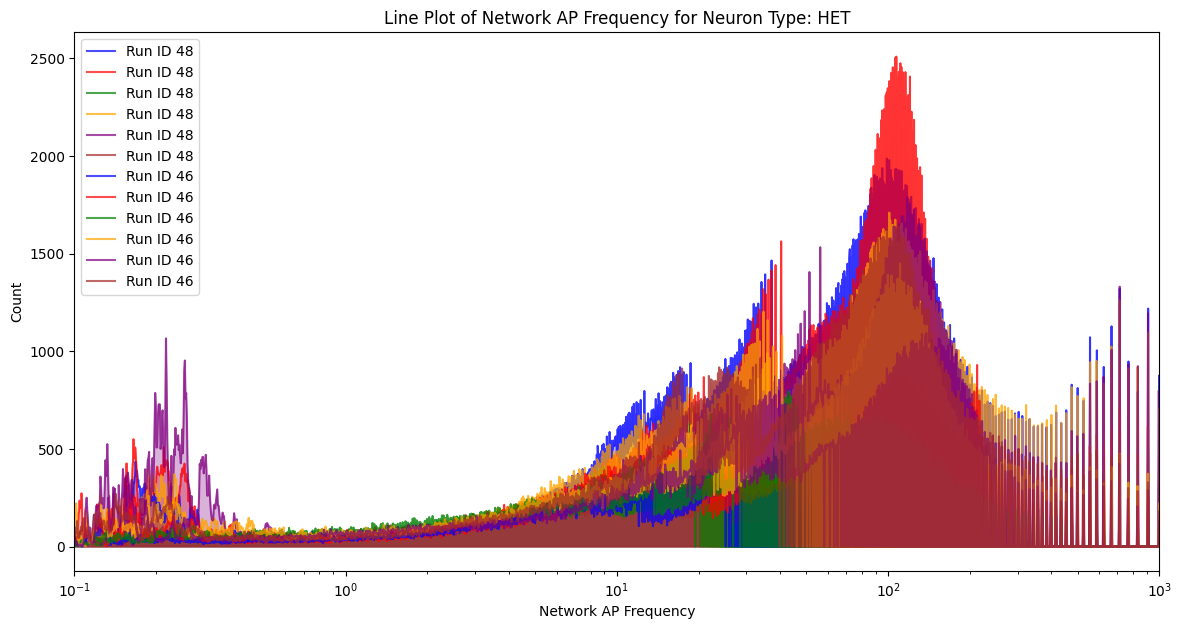

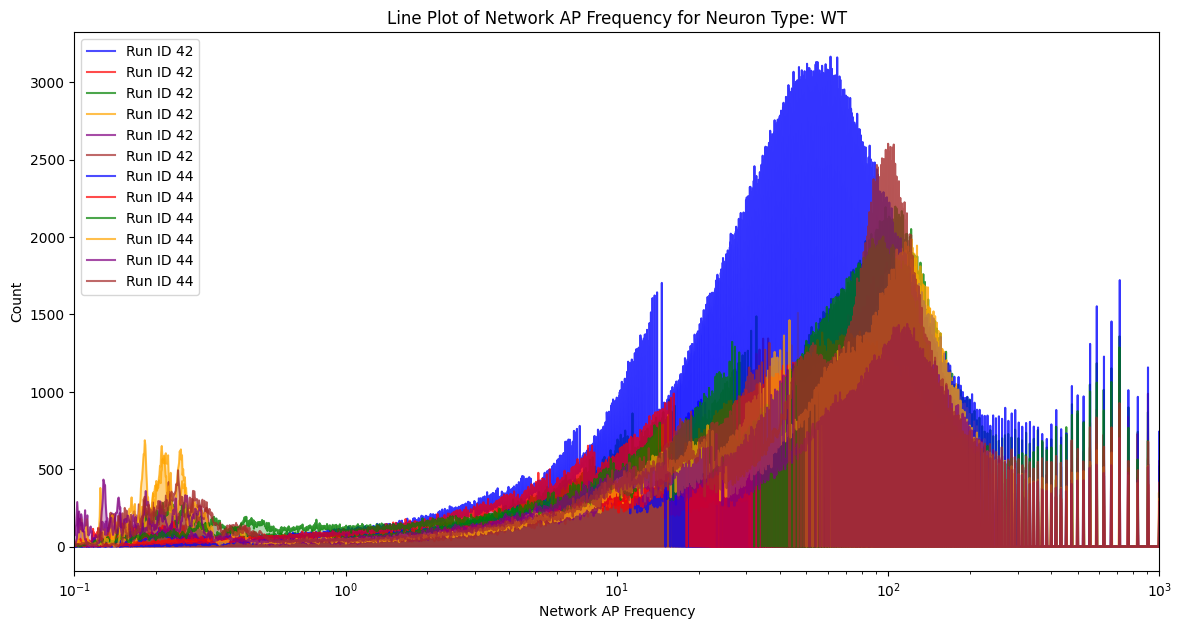

In [51]:
def plot_histograms(neuron_types, network_ap_freq_bins, network_ap_freq_edges, run_ids):
    unique_neuron_types = set(neuron_types)
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']

    for neuron_type in unique_neuron_types:
        indices = [i for i, x in enumerate(neuron_types) if x == neuron_type]
        
        plt.figure(figsize=(14, 7))
        for i, idx in enumerate(indices):
            x = network_ap_freq_edges[idx][:-1]
            y = network_ap_freq_bins[idx]
            if len(x) == len(y):
                plt.plot(x, y, alpha=0.7, label=f'Run ID {run_ids[idx]}', color=colors[i % len(colors)])
                plt.fill_between(x, y, alpha=0.3, color=colors[i % len(colors)])
        
        plt.xscale('log')
        plt.xlabel('Network AP Frequency')
        plt.ylabel('Count')
        plt.title(f'Line Plot of Network AP Frequency for Neuron Type: {neuron_type}')
        plt.legend()
        plt.xlim(0.1, 1000)  # Extending the x-axis range
        plt.show()

# Plot the histograms
plot_histograms(div_data_df['NeuronType'], div_data_df['networkAPFreqBins'], div_data_df['networkAPFreqEdges'], div_data_df['Run_ID'])

In [52]:
#Plotting it again without normalization Network AFP Freq bins and edges but this time taking DIV==21

In [68]:

import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# Load the MATLAB file
mat_file_path = '/srv/network_analysis_outputs/SYNGAP1_T1_v2/Network_outputs/extendedMetrics.mat'
mat_data = scipy.io.loadmat(mat_file_path)

# Extract the relevant data from the MATLAB file
allExtMetrics = mat_data['allExtMetrics']

# Initialize lists to hold the extracted data
neuron_types = []
network_ap_freq_bins = []
network_ap_freq_edges = []
run_ids = []

# Navigate through the nested arrays
for i in range(allExtMetrics.shape[1]):
    # Access each metric in the allExtMetrics array
    for j in range(allExtMetrics[0, i].shape[0]):
        metric = allExtMetrics[0, i][j, 0]
        if metric['DIV'][0][0] == 21: #taking div to be 21
            #print("DIV 21 found!")
            neuron_type = metric['NeuronType'][0][0]
            bins = metric['networkAPFreqBins'][0][0]
            edges = metric['networkAPFreqEdges'][0][0]
            run_id = metric['Run_ID'][0][0]

            if bins.size > 0 and edges.size > 0:
                neuron_types.append(neuron_type)
                network_ap_freq_bins.append(bins)
                network_ap_freq_edges.append(edges)
                run_ids.append(run_id)

# Convert NumPy array elements to strings for neuron_types during extraction
neuron_types = [str(nt[0]) for nt in neuron_types]
run_ids = [int(rid[0]) for rid in run_ids]

# Adjust the extraction to flatten the bins and edges
network_ap_freq_bins = [bins.flatten() for bins in network_ap_freq_bins]
network_ap_freq_edges = [edges.flatten() for edges in network_ap_freq_edges]

# Function to plot histograms for each neuron type as lines with shading
def plot_histograms(neuron_types, network_ap_freq_bins, network_ap_freq_edges, run_ids):
    unique_neuron_types = set(neuron_types)
    
    for neuron_type in unique_neuron_types:
        indices = [i for i, x in enumerate(neuron_types) if x == neuron_type]
        
        plt.figure(figsize=(12, 8))
        for i in indices:
            # Ensure x and y have the same length
            x = network_ap_freq_edges[i][:-1]
            y = network_ap_freq_bins[i]
            if len(x) == len(y):
                plt.plot(x, y, alpha=0.7, label=f'Run ID {run_ids[i]}')
                plt.fill_between(x, y, alpha=0.3)
        
        plt.xscale('log')
        plt.xlabel('Network AP Frequency')
        plt.ylabel('Count')
        plt.title(f'Line Plot of Network AP Frequency for Neuron Type: {neuron_type}')
        plt.legend()
        plt.xlim(0.1, 1000)  # Extending the x-axis range
        plt.show()

# Plot the histograms
plot_histograms(neuron_types, network_ap_freq_bins, network_ap_freq_edges, run_ids)


In [54]:
#Now plotting where the DIV is 21 and the RUN_ID is 57 and 59. Still without normalization 

In [55]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# Load the MATLAB file
mat_file_path = '/srv/network_analysis_outputs/SYNGAP1_T1_v2/Network_outputs/extendedMetrics.mat'
mat_data = scipy.io.loadmat(mat_file_path)

# Extract the relevant data from the MATLAB file
allExtMetrics = mat_data['allExtMetrics']

# Initialize lists to hold the extracted data
neuron_types = []
network_ap_freq_bins = []
network_ap_freq_edges = []
run_ids = []

# Navigate through the nested arrays
for i in range(allExtMetrics.shape[1]):
    # Access each metric in the allExtMetrics array
    for j in range(allExtMetrics[0, i].shape[0]):
        metric = allExtMetrics[0, i][j, 0]
        if metric['DIV'][0][0] == 21:  # taking div to be 21
            run_id = metric['Run_ID'][0][0]
            if run_id in [57, 59]:  # only include Run_ID 57 and 59
                neuron_type = metric['NeuronType'][0][0]
                bins = metric['networkAPFreqBins'][0][0]
                edges = metric['networkAPFreqEdges'][0][0]

                if bins.size > 0 and edges.size > 0:
                    neuron_types.append(neuron_type)
                    network_ap_freq_bins.append(bins)
                    network_ap_freq_edges.append(edges)
                    run_ids.append(run_id)

# Convert NumPy array elements to strings for neuron_types during extraction
neuron_types = [str(nt[0]) for nt in neuron_types]
run_ids = [int(rid[0]) for rid in run_ids]

# Adjust the extraction to flatten the bins and edges
network_ap_freq_bins = [bins.flatten() for bins in network_ap_freq_bins]
network_ap_freq_edges = [edges.flatten() for edges in network_ap_freq_edges]

# Function to plot histograms for each neuron type as lines with shading
def plot_histograms(neuron_types, network_ap_freq_bins, network_ap_freq_edges, run_ids):
    unique_neuron_types = set(neuron_types)
    colors = ['blue', 'red']

    for neuron_type in unique_neuron_types:
        indices = [i for i, x in enumerate(neuron_types) if x == neuron_type]
        
        plt.figure(figsize=(14, 7))
        for i, idx in enumerate(indices):
            x = network_ap_freq_edges[idx][:-1]
            y = network_ap_freq_bins[idx]
            if len(x) == len(y):
                plt.plot(x, y, alpha=0.7, label=f'Run ID {run_ids[idx]}', color=colors[i % len(colors)])
                plt.fill_between(x, y, alpha=0.3, color=colors[i % len(colors)])
        
        plt.xscale('log')
        plt.xlabel('Network AP Frequency')
        plt.ylabel('Count')
        plt.title(f'Line Plot of Network AP Frequency for Neuron Type: {neuron_type}')
        plt.legend()
        plt.xlim(0.1, 1000)  # Extending the x-axis range
        plt.show()

# Plot the histograms
plot_histograms(neuron_types, network_ap_freq_bins, network_ap_freq_edges, run_ids)


In [56]:
#Plotting the normalized graphs where the DIV is 21 and the RUN_ID is 57 and 59. 

In [57]:

import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# Load the MATLAB file
mat_file_path = '/srv/network_analysis_outputs/SYNGAP1_T1_v2/Network_outputs/extendedMetrics.mat'
mat_data = scipy.io.loadmat(mat_file_path)

# Extract the relevant data from the MATLAB file
allExtMetrics = mat_data['allExtMetrics']

# Initialize lists to hold the extracted data
neuron_types = []
network_ap_freq_bins = []
network_ap_freq_edges = []
run_ids = []

# Navigate through the nested arrays
for i in range(allExtMetrics.shape[1]):
    # Access each metric in the allExtMetrics array
    for j in range(allExtMetrics[0, i].shape[0]):
        metric = allExtMetrics[0, i][j, 0]
        if metric['DIV'][0][0] == 21:  # taking div to be 21
            run_id = metric['Run_ID'][0][0]
            if run_id in [57, 59]:  # only include Run_ID 57 and 59
                neuron_type = metric['NeuronType'][0][0]
                bins = metric['networkAPFreqBins'][0][0]
                edges = metric['networkAPFreqEdges'][0][0]

                if bins.size > 0 and edges.size > 0:
                    neuron_types.append(neuron_type)
                    network_ap_freq_bins.append(bins)
                    network_ap_freq_edges.append(edges)
                    run_ids.append(run_id)

# Convert NumPy array elements to strings for neuron_types during extraction
neuron_types = [str(nt[0]) for nt in neuron_types]
run_ids = [int(rid[0]) for rid in run_ids]

# Adjust the extraction to flatten the bins and edges
network_ap_freq_bins = [bins.flatten() for bins in network_ap_freq_bins]
network_ap_freq_edges = [edges.flatten() for edges in network_ap_freq_edges]

# Function to normalize the bins
def normalize_bins(bins):
    total_count = np.sum(bins)
    return bins / total_count if total_count != 0 else bins

# Function to plot histograms for each neuron type as lines with shading
def plot_histograms(neuron_types, network_ap_freq_bins, network_ap_freq_edges, run_ids):
    unique_neuron_types = set(neuron_types)
    colors = ['blue', 'red']

    for neuron_type in unique_neuron_types:
        indices = [i for i, x in enumerate(neuron_types) if x == neuron_type]
        
        plt.figure(figsize=(14, 7))
        for i, idx in enumerate(indices):
            x = network_ap_freq_edges[idx][:-1]
            y = normalize_bins(network_ap_freq_bins[idx])
            if len(x) == len(y):
                plt.plot(x, y, alpha=0.7, label=f'Run ID {run_ids[idx]}', color=colors[i % len(colors)])
                plt.fill_between(x, y, alpha=0.3, color=colors[i % len(colors)])
        
        plt.xscale('log')
        plt.xlabel('Network AP Frequency')
        plt.ylabel('Normalized Count')
        plt.title(f'Normalized Line Plot of Network AP Frequency for Neuron Type: {neuron_type}')
        plt.legend()
        plt.xlim(0.1, 1000)  # Extending the x-axis range
        plt.show()

# Plot the histograms
plot_histograms(neuron_types, network_ap_freq_bins, network_ap_freq_edges, run_ids)


In [58]:
#Plotting normalized means and standard error  where the DIV is 21 and the RUN_ID is 57 and 59.

In [59]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# Load the MATLAB file
mat_file_path = '/srv/network_analysis_outputs/SYNGAP1_T1_v2/Network_outputs/extendedMetrics.mat'
mat_data = scipy.io.loadmat(mat_file_path)

# Extract the relevant data from the MATLAB file
allExtMetrics = mat_data['allExtMetrics']

# Initialize lists to hold the extracted data
neuron_types = []
network_ap_freq_bins = []
network_ap_freq_edges = [] 
run_ids = []

# Navigate through the nested arrays
for i in range(allExtMetrics.shape[1]):
    # Access each metric in the allExtMetrics array
    for j in range(allExtMetrics[0, i].shape[0]):
        metric = allExtMetrics[0, i][j, 0]
        if metric['DIV'][0][0] == 21:  # taking div to be 21
            run_id = metric['Run_ID'][0][0]
            if run_id in [57, 59]:  # only include Run_ID 57 and 59
                neuron_type = metric['NeuronType'][0][0]
                bins = metric['networkAPFreqBins'][0][0]
                edges = metric['networkAPFreqEdges'][0][0]

                if bins.size > 0 and edges.size > 0:
                    neuron_types.append(neuron_type)
                    network_ap_freq_bins.append(bins)
                    network_ap_freq_edges.append(edges)
                    run_ids.append(run_id)

# Convert NumPy array elements to strings for neuron_types during extraction
neuron_types = [str(nt[0]) for nt in neuron_types]
run_ids = [int(rid[0]) for rid in run_ids]

# Adjust the extraction to flatten the bins and edges
network_ap_freq_bins = [bins.flatten() for bins in network_ap_freq_bins]
network_ap_freq_edges = [edges.flatten() for edges in network_ap_freq_edges]

# Function to normalize the bins
def normalize_bins(bins):
    total_count = np.sum(bins)
    return bins / total_count if total_count != 0 else bins

# Function to interpolate bins to a common x-axis
def interpolate_bins(x, y, common_x):
    return np.interp(common_x, x, y)

# Function to plot histograms for each neuron type as lines with shading
def plot_histograms(neuron_types, network_ap_freq_bins, network_ap_freq_edges, run_ids):
    unique_neuron_types = set(neuron_types)
    colors = {'HOM': 'red', 'WT': 'blue', 'HET': 'green'}
    common_x = np.logspace(-1, 3, 100)  # Define a common x-axis for interpolation

    for neuron_type in unique_neuron_types:
        indices = [i for i, x in enumerate(neuron_types) if x == neuron_type]
        
        plt.figure(figsize=(14, 7))
        all_bins = []
        for i, idx in enumerate(indices):
            x = network_ap_freq_edges[idx][:-1]
            y = normalize_bins(network_ap_freq_bins[idx])
            if len(x) == len(y):
                y_interp = interpolate_bins(x, y, common_x)
                all_bins.append(y_interp)
        
        if all_bins:
            all_bins = np.array(all_bins)
            mean_bins = np.mean(all_bins, axis=0)
            sem_bins = np.std(all_bins, axis=0) / np.sqrt(all_bins.shape[0])
            
            plt.plot(common_x, mean_bins, label=f'{neuron_type} (mean)', color=colors.get(neuron_type, 'black'))
            plt.fill_between(common_x, mean_bins - sem_bins, mean_bins + sem_bins, color=colors.get(neuron_type, 'black'), alpha=0.3)
        
        plt.xscale('log')
        plt.xlabel('Network AP Frequency')
        plt.ylabel('Normalized Count')
        plt.title(f'Normalized Line Plot of Network AP Frequency for Neuron Type: {neuron_type}')
        plt.legend()
        plt.xlim(0.1, 1000)  # Extending the x-axis range
        plt.show()

# Plot the histograms
plot_histograms(neuron_types, network_ap_freq_bins, network_ap_freq_edges, run_ids)


In [60]:
#putting the above graphs into a single graph 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


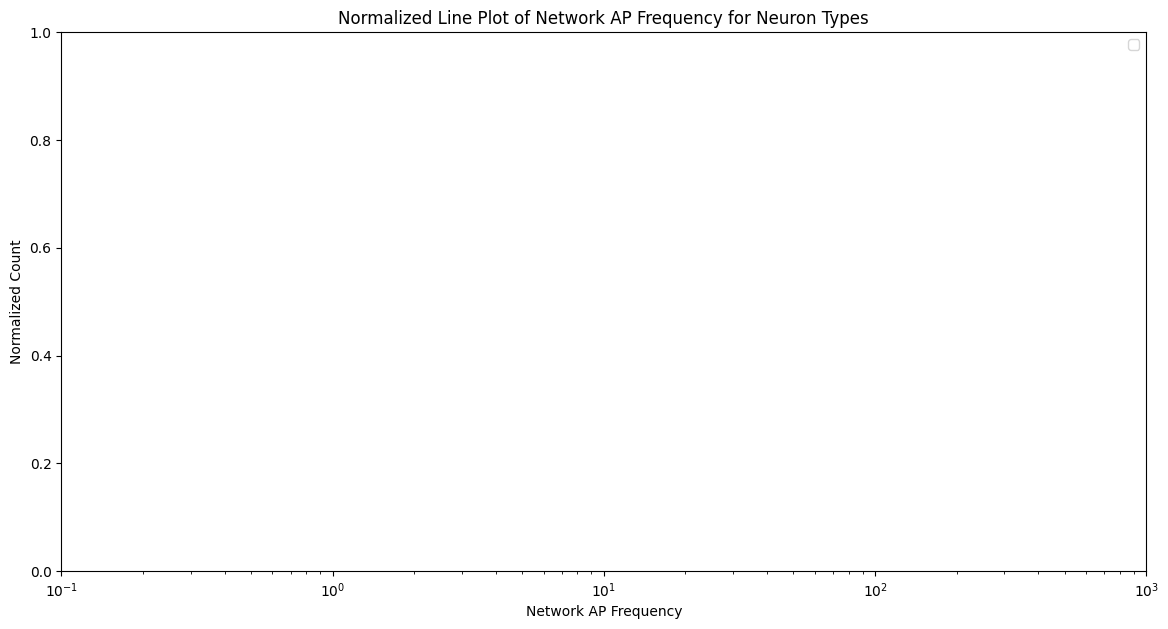

In [61]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# Load the MATLAB file
mat_file_path = '/srv/network_analysis_outputs/SYNGAP1_T1_v2/Network_outputs/extendedMetrics.mat'
mat_data = scipy.io.loadmat(mat_file_path)

# Extract the relevant data from the MATLAB file
allExtMetrics = mat_data['allExtMetrics']

# Initialize lists to hold the extracted data
neuron_types = []
network_ap_freq_bins = []
network_ap_freq_edges = []
run_ids = []

# Navigate through the nested arrays
for i in range(allExtMetrics.shape[1]):
    # Access each metric in the allExtMetrics array
    for j in range(allExtMetrics[0, i].shape[0]):
        metric = allExtMetrics[0, i][j, 0]
        if metric['DIV'][0][0] == 21:  # taking div to be 21
            run_id = metric['Run_ID'][0][0]
            if run_id in [57, 59]:  # only include Run_ID 57 and 59
                neuron_type = metric['NeuronType'][0][0]
                bins = metric['networkAPFreqBins'][0][0]
                edges = metric['networkAPFreqEdges'][0][0]

                if bins.size > 0 and edges.size > 0:
                    neuron_types.append(neuron_type)
                    network_ap_freq_bins.append(bins)
                    network_ap_freq_edges.append(edges)
                    run_ids.append(run_id)

# Convert NumPy array elements to strings for neuron_types during extraction
neuron_types = [str(nt[0]) for nt in neuron_types]
run_ids = [int(rid[0]) for rid in run_ids]

# Adjust the extraction to flatten the bins and edges
network_ap_freq_bins = [bins.flatten() for bins in network_ap_freq_bins]
network_ap_freq_edges = [edges.flatten() for edges in network_ap_freq_edges]

# Function to normalize the bins
def normalize_bins(bins):
    total_count = np.sum(bins)
    return bins / total_count if total_count != 0 else bins

# Function to interpolate bins to a common x-axis
def interpolate_bins(x, y, common_x):
    return np.interp(common_x, x, y)

# Function to plot histograms for all neuron types in a single graph
def plot_histograms(neuron_types, network_ap_freq_bins, network_ap_freq_edges, run_ids):
    unique_neuron_types = set(neuron_types)
    colors = {'HOM': 'red', 'WT': 'blue', 'HET': 'green'}
    common_x = np.logspace(-1, 3, 100)  # Define a common x-axis for interpolation

    plt.figure(figsize=(14, 7))
    for neuron_type in unique_neuron_types:
        indices = [i for i, x in enumerate(neuron_types) if x == neuron_type]
        
        all_bins = []
        for i, idx in enumerate(indices):
            x = network_ap_freq_edges[idx][:-1]
            y = normalize_bins(network_ap_freq_bins[idx])
            if len(x) == len(y):
                y_interp = interpolate_bins(x, y, common_x)
                all_bins.append(y_interp)
        
        if all_bins:
            all_bins = np.array(all_bins)
            mean_bins = np.mean(all_bins, axis=0)
            sem_bins = np.std(all_bins, axis=0) / np.sqrt(all_bins.shape[0])
            
            plt.plot(common_x, mean_bins, label=f'{neuron_type} (mean)', color=colors.get(neuron_type, 'black'))
            plt.fill_between(common_x, mean_bins - sem_bins, mean_bins + sem_bins, color=colors.get(neuron_type, 'black'), alpha=0.3)
    
    plt.xscale('log')
    plt.xlabel('Network AP Frequency')
    plt.ylabel('Normalized Count')
    plt.title('Normalized Line Plot of Network AP Frequency for Neuron Types')
    plt.legend()
    plt.xlim(0.1, 1000)  # Extending the x-axis range
    plt.show()

# Plot the histograms
plot_histograms(neuron_types, network_ap_freq_bins, network_ap_freq_edges, run_ids)


In [62]:
#Network using Burst APF edges and bins where DIV is 21

In [63]:


import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# Load the MATLAB file
mat_file_path = '/srv/network_analysis_outputs/SYNGAP1_T1_v2/Network_outputs/extendedMetrics.mat'
mat_data = scipy.io.loadmat(mat_file_path)

# Extract the relevant data from the MATLAB file
allExtMetrics = mat_data['allExtMetrics']

# Initialize lists to hold the extracted data
neuron_types = []
burst_ap_freq_bins = []
burst_ap_freq_edges = []
run_ids = []

# Navigate through the nested arrays
for i in range(allExtMetrics.shape[1]):
    # Access each metric in the allExtMetrics array
    for j in range(allExtMetrics[0, i].shape[0]):
        metric = allExtMetrics[0, i][j, 0]
        if metric['DIV'][0][0] == 21: #taking div to be 21
            
            neuron_type = metric['NeuronType'][0][0]
            bins = metric['burstAPFreqBins'][0][0]
            edges = metric['burstAPFreqEdges'][0][0]
            run_id = metric['Run_ID'][0][0]

            if bins.size > 0 and edges.size > 0:
                neuron_types.append(neuron_type)
                burst_ap_freq_bins.append(bins)
                burst_ap_freq_edges.append(edges)
                run_ids.append(run_id)

# Convert NumPy array elements to strings for neuron_types during extraction
neuron_types = [str(nt[0]) for nt in neuron_types]
run_ids = [int(rid[0]) for rid in run_ids]

# Adjust the extraction to flatten the bins and edges
burst_ap_freq_bins = [bins.flatten() for bins in burst_ap_freq_bins]
burst_ap_freq_edges = [edges.flatten() for edges in burst_ap_freq_edges]

# Function to plot histograms for each neuron type as lines with shading
def plot_histograms(neuron_types, burst_ap_freq_bins, burst_ap_freq_edges, run_ids):
    unique_neuron_types = set(neuron_types)
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']

    for neuron_type in unique_neuron_types:
        indices = [i for i, x in enumerate(neuron_types) if x == neuron_type]
        
        plt.figure(figsize=(14, 7))
        for i, idx in enumerate(indices):
            x = burst_ap_freq_edges[idx][:-1]
            y = burst_ap_freq_bins[idx]
            if len(x) == len(y):
                plt.plot(x, y, alpha=0.7, label=f'Run ID {run_ids[idx]}', color=colors[i % len(colors)])
                plt.fill_between(x, y, alpha=0.3, color=colors[i % len(colors)])
        
        plt.xscale('log')
        plt.xlabel('Burst AP Frequency')
        plt.ylabel('Count')
        plt.title(f'Line Plot of Burst AP Frequency for Neuron Type: {neuron_type}')
        plt.legend()
        plt.xlim(0.1, 1000)  # Extending the x-axis range
        plt.show()

# Plot the histograms
plot_histograms(neuron_types, burst_ap_freq_bins, burst_ap_freq_edges, run_ids)


In [64]:
#Taking only 57 and 59 and DIV to be 21 now for Burst AP Frequency 

In [65]:

import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# Load the MATLAB file
mat_file_path = '/srv/network_analysis_outputs/SYNGAP1_T1_v2/Network_outputs/extendedMetrics.mat'
mat_data = scipy.io.loadmat(mat_file_path)

# Extract the relevant data from the MATLAB file
allExtMetrics = mat_data['allExtMetrics']

# Initialize lists to hold the extracted data
neuron_types = []
burst_ap_freq_bins = []
burst_ap_freq_edges = []
run_ids = []

# Navigate through the nested arrays
for i in range(allExtMetrics.shape[1]):
    # Access each metric in the allExtMetrics array
    for j in range(allExtMetrics[0, i].shape[0]):
        metric = allExtMetrics[0, i][j, 0]
        if metric['DIV'][0][0] == 21: #taking div to be 21
            run_id = metric['Run_ID'][0][0]
            if run_id in [57, 59]: # only include Run_ID 57 and 59
                neuron_type = metric['NeuronType'][0][0]
                bins = metric['burstAPFreqBins'][0][0]
                edges = metric['burstAPFreqEdges'][0][0]

                if bins.size > 0 and edges.size > 0:
                    neuron_types.append(neuron_type)
                    burst_ap_freq_bins.append(bins)
                    burst_ap_freq_edges.append(edges)
                    run_ids.append(run_id)

# Convert NumPy array elements to strings for neuron_types during extraction
neuron_types = [str(nt[0]) for nt in neuron_types]
run_ids = [int(rid[0]) for rid in run_ids]

# Adjust the extraction to flatten the bins and edges
burst_ap_freq_bins = [bins.flatten() for bins in burst_ap_freq_bins]
burst_ap_freq_edges = [edges.flatten() for edges in burst_ap_freq_edges]

# Function to plot histograms for each neuron type as lines with shading
def plot_histograms(neuron_types, burst_ap_freq_bins, burst_ap_freq_edges, run_ids):
    unique_neuron_types = set(neuron_types)
    colors = ['blue', 'red']

    for neuron_type in unique_neuron_types:
        indices = [i for i, x in enumerate(neuron_types) if x == neuron_type]
        
        plt.figure(figsize=(14, 7))
        for i, idx in enumerate(indices):
            x = burst_ap_freq_edges[idx][:-1]
            y = burst_ap_freq_bins[idx]
            if len(x) == len(y):
                plt.plot(x, y, alpha=0.7, label=f'Run ID {run_ids[idx]}', color=colors[i % len(colors)])
                plt.fill_between(x, y, alpha=0.3, color=colors[i % len(colors)])
        
        plt.xscale('log')
        plt.xlabel('Burst AP Frequency')
        plt.ylabel('Count')
        plt.title(f'Line Plot of Burst AP Frequency for Neuron Type: {neuron_type}')
        plt.legend()
        plt.xlim(0.1, 1000)  # Extending the x-axis range
        plt.show()

# Plot the histograms
plot_histograms(neuron_types, burst_ap_freq_bins, burst_ap_freq_edges, run_ids)


In [66]:
#combining all the run_id 57 and 59 into one taking the average of 8 HOM, 2 WT and 2 HET for Network AP Frequency 

In [67]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# Load the MATLAB file
mat_file_path = '/srv/network_analysis_outputs/SYNGAP1_T1_v2/Network_outputs/extendedMetrics.mat'
mat_data = scipy.io.loadmat(mat_file_path)

# Extract the relevant data from the MATLAB file
allExtMetrics = mat_data['allExtMetrics']

# Initialize lists to hold the extracted data
neuron_types = []
network_ap_freq_bins = []
network_ap_freq_edges = []
run_ids = []

# Navigate through the nested arrays
for i in range(allExtMetrics.shape[1]):
    # Access each metric in the allExtMetrics array
    for j in range(allExtMetrics[0, i].shape[0]):
        metric = allExtMetrics[0, i][j, 0]
        if metric['DIV'][0][0] == 21:  # taking div to be 21
            run_id = metric['Run_ID'][0][0]
            if run_id in [57, 59]:  # only include Run_ID 57 and 59
                neuron_type = metric['NeuronType'][0][0]
                bins = metric['networkAPFreqBins'][0][0]
                edges = metric['networkAPFreqEdges'][0][0]

                if bins.size > 0 and edges.size > 0:
                    neuron_types.append(neuron_type)
                    network_ap_freq_bins.append(bins)
                    network_ap_freq_edges.append(edges)
                    run_ids.append(run_id)

# Convert NumPy array elements to strings for neuron_types during extraction
neuron_types = [str(nt[0]) for nt in neuron_types]
run_ids = [int(rid[0]) for rid in run_ids]

# Adjust the extraction to flatten the bins and edges
network_ap_freq_bins = [bins.flatten() for bins in network_ap_freq_bins]
network_ap_freq_edges = [edges.flatten() for edges in network_ap_freq_edges]

# Ensure all arrays are of the same length by truncating to the shortest length
min_length = min(len(bins) for bins in network_ap_freq_bins)
network_ap_freq_bins = [bins[:min_length] for bins in network_ap_freq_bins]
network_ap_freq_edges = [edges[:min_length + 1] for edges in network_ap_freq_edges]  # edges have one more element than bins

# Function to plot histograms for each neuron type as lines with shading
def plot_histograms(neuron_types, network_ap_freq_bins, network_ap_freq_edges, run_ids):
    unique_neuron_types = set(neuron_types)
    colors = {'HOM': 'red', 'WT': 'blue', 'HET': 'green'}

    plt.figure(figsize=(14, 7))
    for neuron_type in unique_neuron_types:
        indices = [i for i, x in enumerate(neuron_types) if x == neuron_type]

        all_bins = []
        for i in indices:
            x = network_ap_freq_edges[i][:-1]
            y = network_ap_freq_bins[i]
            if len(x) == len(y):
                all_bins.append(y)

        if all_bins:
            mean_bins = np.mean(all_bins, axis=0)
            sem_bins = np.std(all_bins, axis=0) / np.sqrt(len(all_bins))
            plt.plot(x, mean_bins, label=f'{neuron_type} (mean)', color=colors[neuron_type])
            plt.fill_between(x, mean_bins - sem_bins, mean_bins + sem_bins, alpha=0.3, color=colors[neuron_type])

    plt.xscale('log')
    plt.xlabel('Network AP Frequency')
    plt.ylabel('Count')
    plt.title(f'Line Plot of Network AP Frequency for Neuron Types (DIV 21, Run_ID 57 and 59)')
    plt.legend()
    plt.xlim(0.01, 1000)  # Extended x-axis range
    plt.ylim(0, 700)  # Keeping the y-axis limit large
    plt.show()

# Plot the histograms
plot_histograms(neuron_types, network_ap_freq_bins, network_ap_freq_edges, run_ids)


ValueError: min() arg is an empty sequence

/var/folders/kx/v7vqz39d5nn79sxpbgh1vn3w0000gn/T/ipykernel_27743/1970691611.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  run_ids = [int(rid[0]) for rid in run_ids]


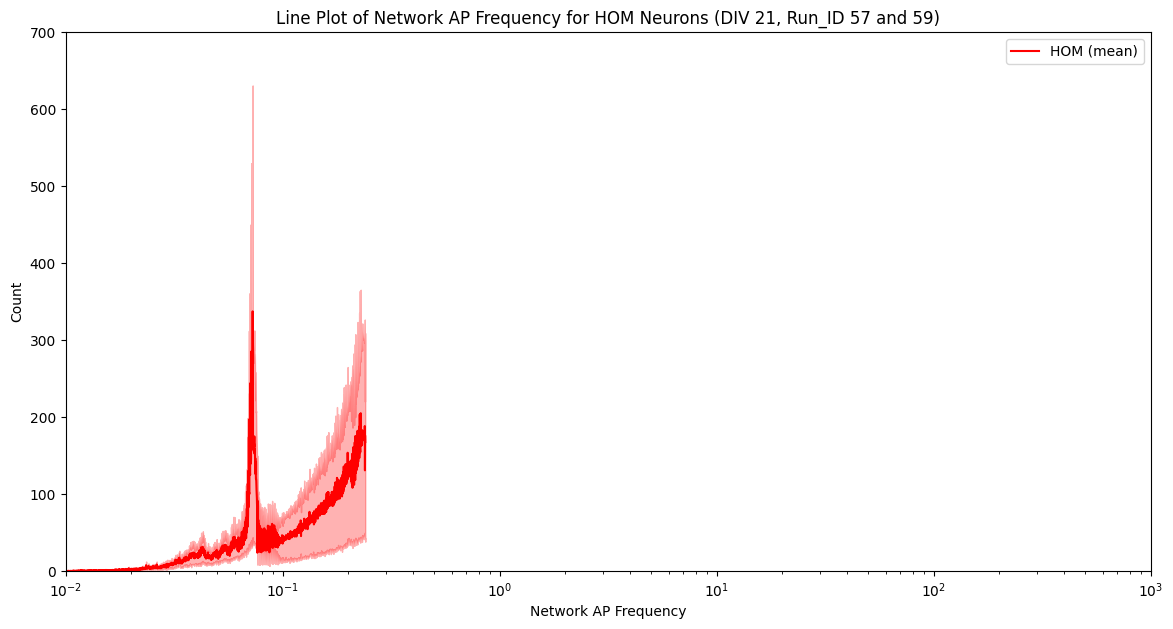

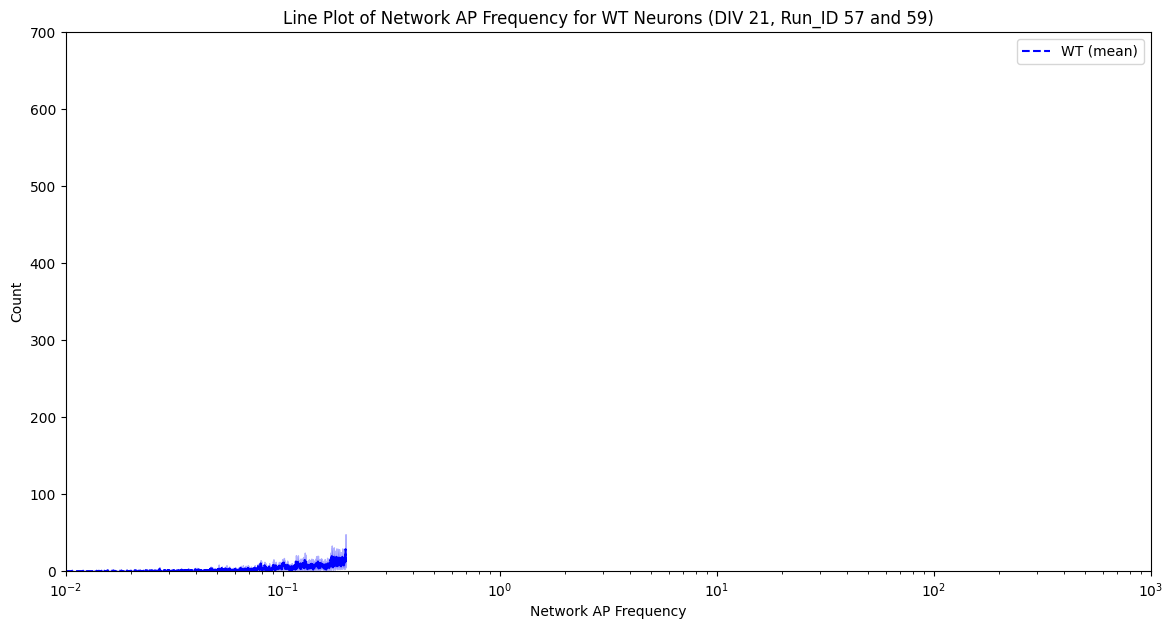

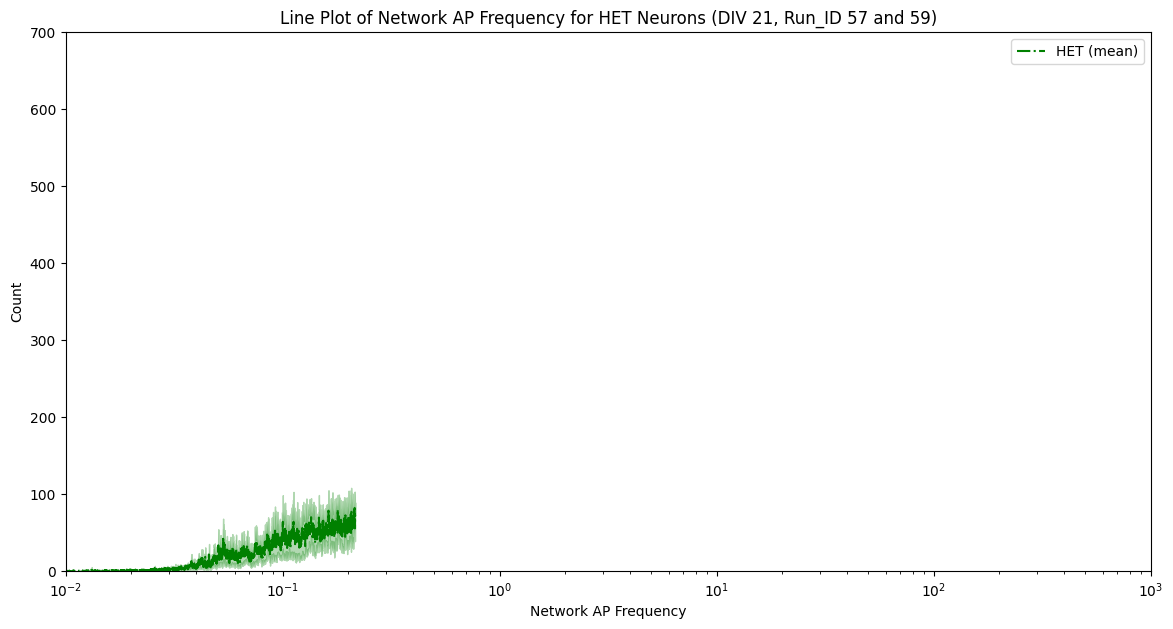

In [ ]:
#Same as above but trying to plot the normalization of the above 

/var/folders/kx/v7vqz39d5nn79sxpbgh1vn3w0000gn/T/ipykernel_27743/1272185698.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  run_ids = [int(rid[0]) for rid in run_ids]


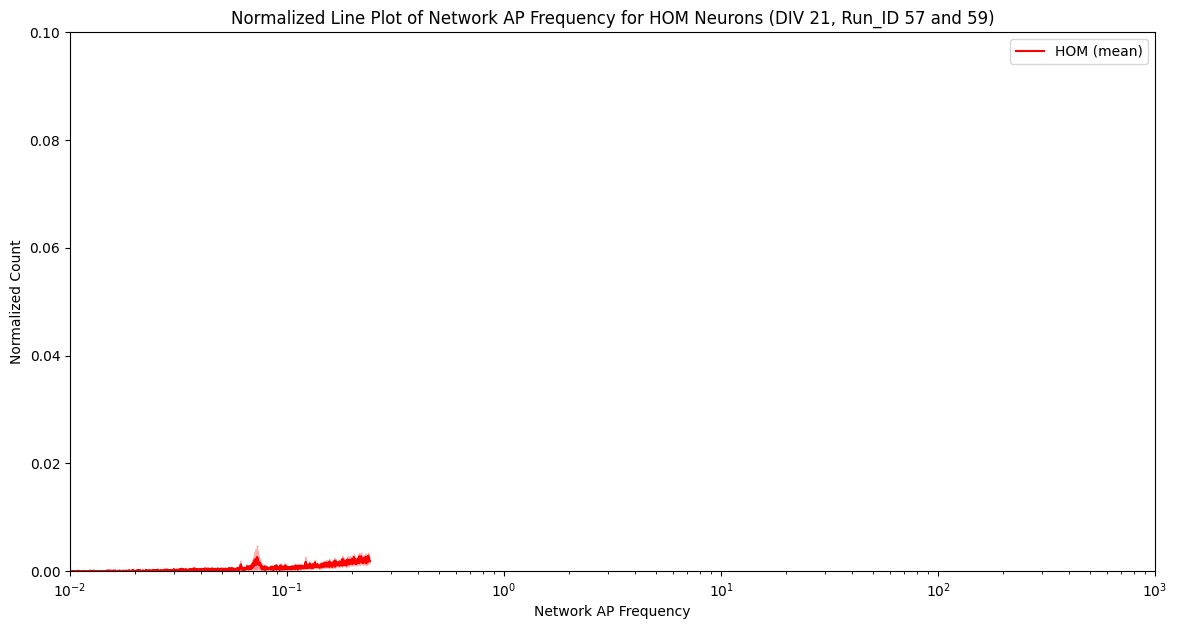

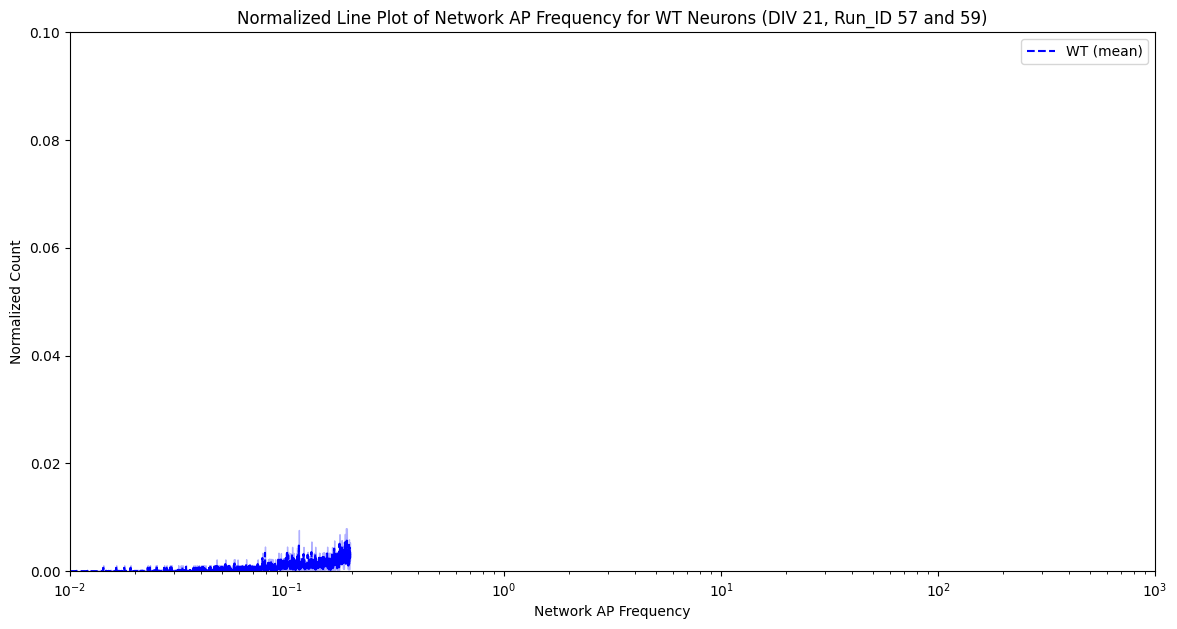

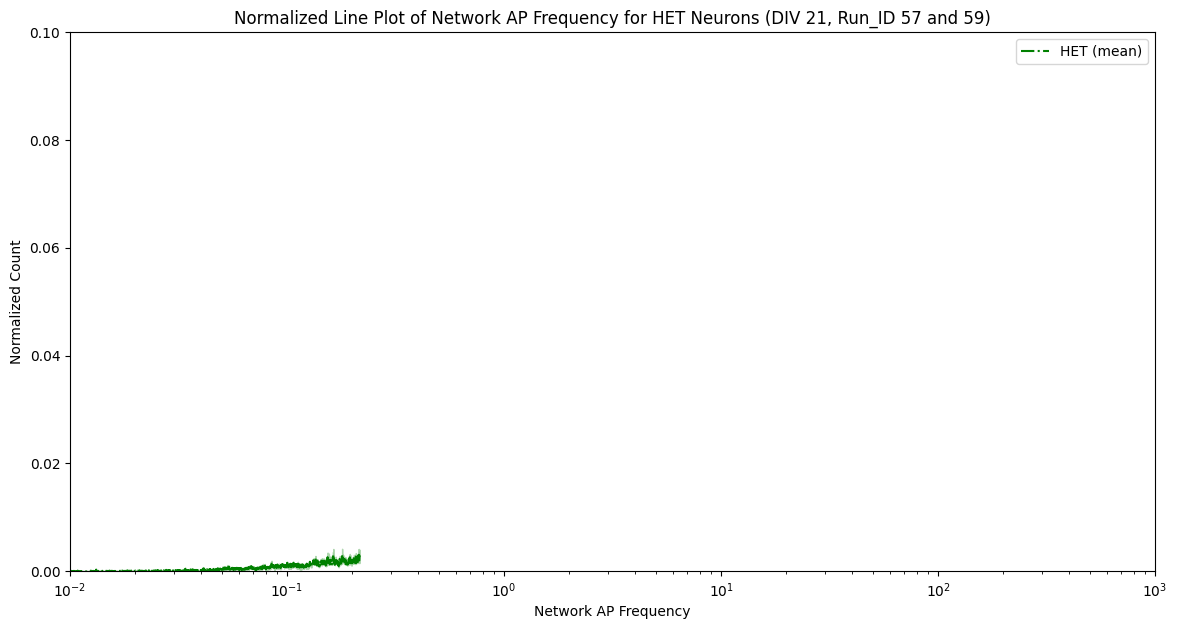

In [ ]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# Load the MATLAB file
mat_file_path = 'extendedMetrics.mat'
mat_data = scipy.io.loadmat(mat_file_path)

# Extract the relevant data from the MATLAB file
allExtMetrics = mat_data['allExtMetrics']

# Initialize lists to hold the extracted data
neuron_types = []
network_ap_freq_bins = []
network_ap_freq_edges = []
run_ids = []

# Navigate through the nested arrays
for i in range(allExtMetrics.shape[1]):
    # Access each metric in the allExtMetrics array
    for j in range(allExtMetrics[0, i].shape[0]):
        metric = allExtMetrics[0, i][j, 0]
        if metric['DIV'][0][0] == 21:  # Taking DIV to be 21
            run_id = metric['Run_ID'][0][0]
            if run_id in [57, 59]:  # Only include Run_ID 57 and 59
                neuron_type = metric['NeuronType'][0][0]
                bins = metric['networkAPFreqBins'][0][0]
                edges = metric['networkAPFreqEdges'][0][0]

                if bins.size > 0 and edges.size > 0:
                    neuron_types.append(neuron_type)
                    network_ap_freq_bins.append(bins)
                    network_ap_freq_edges.append(edges)
                    run_ids.append(run_id)

# Convert NumPy array elements to strings for neuron_types during extraction
neuron_types = [str(nt[0]) for nt in neuron_types]
run_ids = [int(rid[0]) for rid in run_ids]

# Adjust the extraction to flatten the bins and edges
network_ap_freq_bins = [bins.flatten() for bins in network_ap_freq_bins]
network_ap_freq_edges = [edges.flatten() for edges in network_ap_freq_edges]

# Ensure all arrays are of the same length by truncating to the shortest length
min_length = min(len(bins) for bins in network_ap_freq_bins)
network_ap_freq_bins = [bins[:min_length] for bins in network_ap_freq_bins]
network_ap_freq_edges = [edges[:min_length + 1] for edges in network_ap_freq_edges]  # Edges have one more element than bins

# Normalize the bins by dividing each by the sum of its elements
network_ap_freq_bins = [bins / np.sum(bins) for bins in network_ap_freq_bins]

# Function to plot histograms for each neuron type as lines with shading
def plot_histograms(neuron_types, network_ap_freq_bins, network_ap_freq_edges, run_ids):
    unique_neuron_types = set(neuron_types)
    colors = {'HOM': 'red', 'WT': 'blue', 'HET': 'green'}
    styles = {'HOM': '-', 'WT': '--', 'HET': '-.'}

    for neuron_type in unique_neuron_types:
        plt.figure(figsize=(14, 7))
        indices = [i for i, x in enumerate(neuron_types) if x == neuron_type]

        all_bins = []
        for i in indices:
            x = network_ap_freq_edges[i][:-1]
            y = network_ap_freq_bins[i]
            if len(x) == len(y):
                all_bins.append(y)

        if all_bins:
            mean_bins = np.mean(all_bins, axis=0)
            sem_bins = np.std(all_bins, axis=0) / np.sqrt(len(all_bins))
            plt.plot(x, mean_bins, label=f'{neuron_type} (mean)', color=colors[neuron_type], linestyle=styles[neuron_type])
            plt.fill_between(x, mean_bins - sem_bins, mean_bins + sem_bins, alpha=0.3, color=colors[neuron_type])

        plt.xscale('log')
        plt.xlabel('Network AP Frequency')
        plt.ylabel('Normalized Count')
        plt.title(f'Normalized Line Plot of Network AP Frequency for {neuron_type} Neurons (DIV 21, Run_ID 57 and 59)')
        plt.legend()
        plt.xlim(0.01, 1000)  # Extended x-axis range
        plt.ylim(0, 0.1)  # Adjust y-axis limit as needed
        plt.show()

# Plot the histograms
plot_histograms(neuron_types, network_ap_freq_bins, network_ap_freq_edges, run_ids)


In [ ]:
#LDA for the all the parameters excluding cov_BurstDuration, mean_Burst_Peak_Normalized, cov_Burst_Peak_Normalized, mean_Burst_Peak, cov_Burst_Peak, Time, Chip_ID, Well. And only for Run_ID=57 and 59

In [ ]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 5.9 MB/s eta 0:00:00a 0:00:01


Index(['NeuronType', 'mean_IBI', 'cov_IBI', 'mean_Burst_Peak',
       'cov_Burst_Peak', 'mean_Burst_Peak_Abs', 'cov_Burst_Peak_Abs',
       'Number_Bursts', 'mean_Spike_per_Burst', 'cov_Spike_per_Burst',
       'mean_BurstDuration', 'MeanNetworkISI', 'CoVNetworkISI',
       'MeanWithinBurstISI', 'CoVWithinBurstISI', 'MeanOutsideBurstISI',
       'CoVOutsideBurstISI', 'Fanofactor'],
      dtype='object')


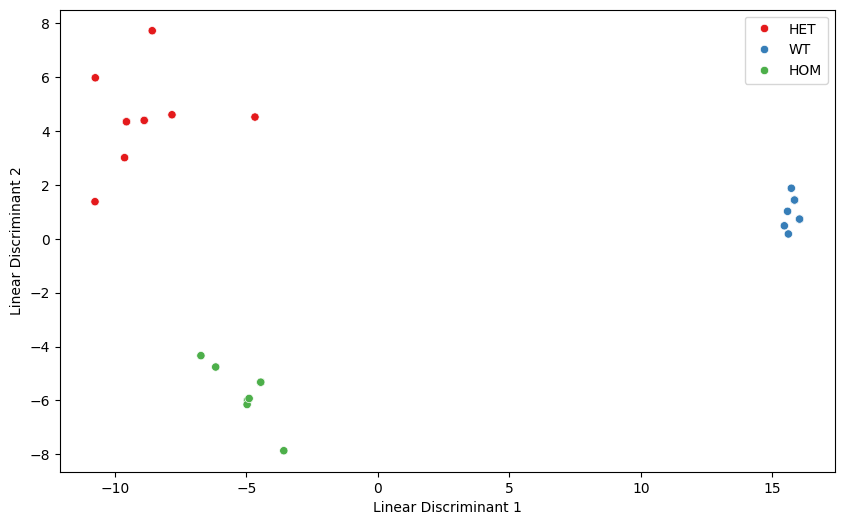

In [ ]:
#Here two categorical var which is Run_ID and NeuronType
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Compiled_Networks_5.csv'
df = pd.read_csv(file_path)

# Filter the DataFrame for Run_ID 59 and 57
filtered_df = df[df['Run_ID'].isin([59, 57, 67])]

# Remove specified columns and drop rows with NaN values
columns_to_consider = ['NeuronType','mean_IBI',
       'cov_IBI', 'mean_Burst_Peak', 'cov_Burst_Peak',
       'mean_Burst_Peak_Abs', 'cov_Burst_Peak_Abs', 'Number_Bursts',
       'mean_Spike_per_Burst', 'cov_Spike_per_Burst', 'mean_BurstDuration',
       'MeanNetworkISI', 'CoVNetworkISI',
       'MeanWithinBurstISI', 'CoVWithinBurstISI', 'MeanOutsideBurstISI',
       'CoVOutsideBurstISI', 'Fanofactor']

filtered_df = df.loc[:, columns_to_consider]
filtered_df=filtered_df.dropna()
print(filtered_df.columns)



# Identify categorical variables
categorical_columns = ['NeuronType']

# Separate features and target variable
X = filtered_df.drop(columns=categorical_columns)
y = filtered_df['NeuronType']

# Apply LDA
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

# Create a DataFrame for LDA results
lda_df = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])
#lda_df = pd.DataFrame(X_lda)
lda_df['NeuronType'] = y.values

# Plot the LDA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LD1', y='LD2', hue='NeuronType', data=lda_df, palette='Set1')
#plt.title('LDA of NeuronType for Run_ID 59 and 57')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.legend(loc='best')
plt.show()


Index(['NeuronType', 'mean_IBI', 'cov_IBI', 'mean_Burst_Peak_Abs',
       'cov_Burst_Peak_Abs', 'Number_Bursts', 'mean_Spike_per_Burst',
       'cov_Spike_per_Burst', 'mean_BurstDuration', 'MeanNetworkISI',
       'CoVNetworkISI', 'MeanWithinBurstISI', 'CoVWithinBurstISI',
       'MeanOutsideBurstISI', 'CoVOutsideBurstISI', 'Fanofactor'],
      dtype='object')
   NeuronType   mean_IBI     cov_IBI  mean_Burst_Peak_Abs  cov_Burst_Peak_Abs  \
1         HET   3.963514   66.593866          9840.191383           25.740220   
2          WT   5.462264   57.346418          5649.008747           38.744949   
3         HOM  12.700000   88.800452          6871.092566           11.205756   
4         HET   4.761290   48.830114          7515.934599           28.077634   
5          WT   4.960345   69.398508          5525.977804           43.732434   
31        HOM  94.333333  103.364465          5262.486792            3.893766   
32        HOM   7.638462   64.742255           493.205526            4

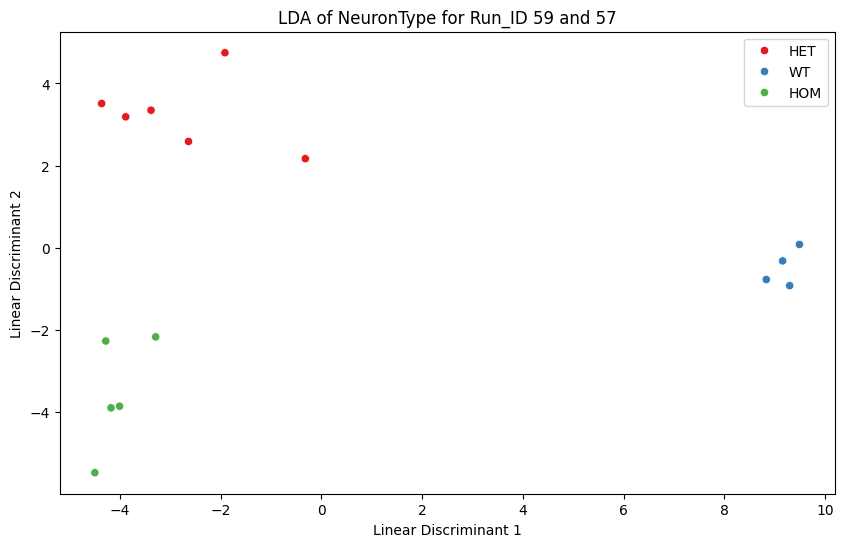

In [ ]:
#categorical variable as Neurontype. Here the number of Discriminants = Number of classes - 1 (Here only 3 HET,HOM and WT ). Des features which is the rest of the columns not dropped vs targert variables (y) (Here the Neuron types)
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Compiled_Networks_5.csv'
df = pd.read_csv(file_path)

# Filter the DataFrame for Run_ID 59 and 57
filtered_df = df[df['Run_ID'].isin([59, 57, 67])]


# Remove specified columns
columns_to_remove = ['cov_BurstDuration', 'mean_Burst_Peak_Normalized', 'cov_Burst_Peak_Normalized',
                     'mean_Burst_Peak', 'cov_Burst_Peak', 'Time', 'Chip_ID', 'Well', 'Run_ID', 'DIV']
filtered_df = filtered_df.drop(columns=columns_to_remove)
print(filtered_df.columns)

# Drop rows with any NaN values
filtered_df = filtered_df.dropna()
print(filtered_df)

# Separate features and target variable, considering only 'NeuronType' as the categorical variable
X = filtered_df.drop(columns=['NeuronType'])
y = filtered_df['NeuronType']

# Apply LDA
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

# Create a DataFrame for LDA results
lda_df = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])
lda_df['NeuronType'] = y.values

# Plot the LDA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LD1', y='LD2', hue='NeuronType', data=lda_df, palette='Set1')
plt.title('LDA of NeuronType for Run_ID 59 and 57')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.legend(loc='best')
plt.show()


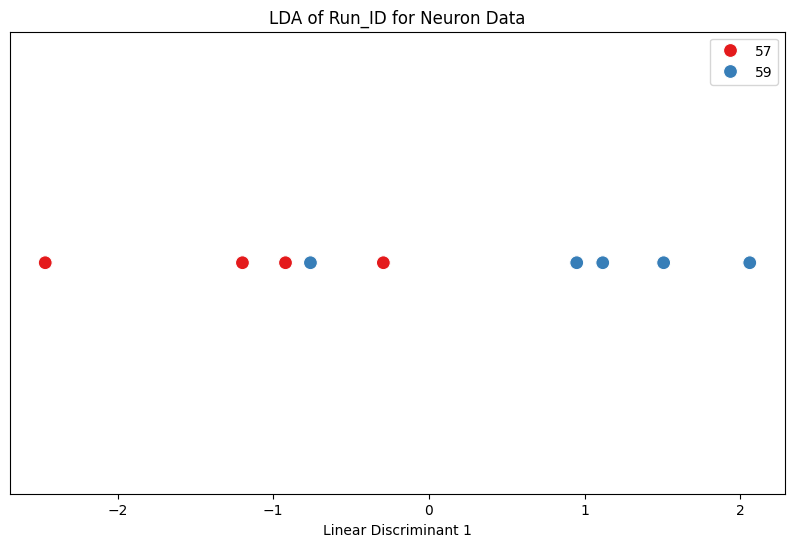

In [ ]:
#categorical value as Run_ID. Here the number of Discriminants = Number of classes - 1 (Here only two classes which is 57 and 59 ). Hence the reason for the one dimension or the straight line
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Compiled_Networks_5.csv'
df = pd.read_csv(file_path)

# Filter the DataFrame for Run_ID 59 and 57
filtered_df = df[df['Run_ID'].isin([59, 57])]

# Remove specified columns
columns_to_remove = ['cov_BurstDuration', 'mean_Burst_Peak_Normalized', 'cov_Burst_Peak_Normalized',
                     'mean_Burst_Peak', 'cov_Burst_Peak', 'Time', 'Chip_ID', 'Well']
filtered_df = filtered_df.drop(columns=columns_to_remove)

# Drop rows with any NaN values
filtered_df = filtered_df.dropna()

# Separate features and target variable, considering only 'Run_ID' as the categorical variable
X = filtered_df.drop(columns=['Run_ID', 'NeuronType'])
y = filtered_df['Run_ID']

# Apply LDA
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

# Create a DataFrame for LDA results
lda_df = pd.DataFrame(X_lda, columns=['LD1'])
lda_df['Run_ID'] = y.values

# Plot the LDA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LD1', y=[0]*len(lda_df), hue='Run_ID', data=lda_df, palette='Set1', s=100, edgecolor='w')
plt.title('LDA of Run_ID for Neuron Data')
plt.xlabel('Linear Discriminant 1')
plt.yticks([])  # Remove y-axis ticks since all values are 0
plt.legend(loc='best')
plt.show()
